# 2002 - 2021 each year Death Rate Data from Every Country

> Apparently we will be needing each year death rate data to predict the rate that will occur in every country from the next 5 years
> Here, we process the data and will be doing prediction using Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')

## Death Data Preparation

In [2]:
df_death = pd.read_csv('total_death_rate.csv')
df_death.head()

economy     YR2000     YR2001     YR2002     YR2003     YR2004     YR2005  \
0     ABW   6.335000   6.348000   6.420000   6.549000   6.808000   6.839000   
1     AFE  13.775698  13.592398  13.309589  12.981271  12.628441  12.233489   
2     AFG  12.096000  11.713000  11.280000  10.698000  10.277000   9.941000   
3     AFW  15.562004  15.287160  15.006906  14.659477  14.348104  13.983941   
4     AGO  18.287000  17.789000  17.275000  15.804000  15.151000  14.497000   

      YR2006     YR2007     YR2008  ...     YR2012     YR2013     YR2014  \
0   6.887000   6.958000   7.179000  ...   7.187000   7.403000   7.729000   
1  11.731215  11.288067  10.863130  ...   9.101050   8.775595   8.475899   
2   9.679000   9.359000   8.832000  ...   7.711000   7.478000   7.395000   
3  13.647235  13.353171  13.087263  ...  11.964805  11.730451  11.544798   
4  13.943000  13.133000  12.478000  ...  10.031000   9.607000   9.181000   

      YR2015     YR2016     YR2017    YR2018     YR2019     YR2020     YR2021  
0   7.968000   8.336000   8.414000   8.59700   8.778000   9.690000  11.235000  
1   8.239619   7.973696   7.773413   7.58811   7.434644   7.620548   8.036899  
2   7.331000   7.077000   7.027000   6.98100   6.791000   7.113000   7.344000  
3  11.352476  11.113635  10.909012  10.71184  10.488748  10.601297  10.678952  
4   8.826000   8.555000   8.242000   7.99000   7.811000   7.821000   8.009000  

[5 rows x 23 columns]

In [3]:
df_country = pd.read_csv('Data-Combination-KaliIniLolos.csv')
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         194 non-null    object 
 1   2_code          193 non-null    object 
 2   3_code          194 non-null    object 
 3   region          194 non-null    object 
 4   sub-region      194 non-null    object 
 5   Land Area(Km2)  194 non-null    int64  
 6   economy         194 non-null    object 
 7   Pop-YR2002      194 non-null    int64  
 8   Pop-YR2021      194 non-null    int64  
 9   Life-YR2002     194 non-null    float64
 10  Life-YR2021     194 non-null    float64
 11  Fer-YR2002      194 non-null    float64
 12  Fer-YR2021      194 non-null    float64
 13  Death-YR2002    194 non-null    float64
 14  Death-YR2021    194 non-null    float64
 15  Birth-YR2002    194 non-null    float64
 16  Birth-YR2021    194 non-null    float64
 17  Pop_Gro-YR2002  194 non-null    flo

In [4]:
country_code = df_country['3_code'].tolist()

mask_2 = df_death['economy'].isin(country_code)
df_death = df_death[mask_2]

df_death.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 2 to 265
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   economy  194 non-null    object 
 1   YR2000   194 non-null    float64
 2   YR2001   194 non-null    float64
 3   YR2002   194 non-null    float64
 4   YR2003   194 non-null    float64
 5   YR2004   194 non-null    float64
 6   YR2005   194 non-null    float64
 7   YR2006   194 non-null    float64
 8   YR2007   194 non-null    float64
 9   YR2008   194 non-null    float64
 10  YR2009   194 non-null    float64
 11  YR2010   194 non-null    float64
 12  YR2011   194 non-null    float64
 13  YR2012   194 non-null    float64
 14  YR2013   194 non-null    float64
 15  YR2014   194 non-null    float64
 16  YR2015   194 non-null    float64
 17  YR2016   194 non-null    float64
 18  YR2017   194 non-null    float64
 19  YR2018   194 non-null    float64
 20  YR2019   194 non-null    float64
 21  YR2020   194 non

In [5]:
df_death.to_csv('Death Rate each year.csv', index=False)

## Time Series Prediction Data Preprocessing

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
df = pd.read_csv('Death Rate each year.csv')
df.head()

economy  YR2000  YR2001  YR2002  YR2003  YR2004  YR2005  YR2006  YR2007  \
0     AFG  12.096  11.713  11.280  10.698  10.277   9.941   9.679   9.359   
1     AGO  18.287  17.789  17.275  15.804  15.151  14.497  13.943  13.133   
2     ALB   5.798   5.872   5.953   6.057   6.181   6.306   6.477   6.318   
3     AND   0.000   0.000   0.000   0.000   3.800   3.600   3.300   2.800   
4     ARE   2.107   2.047   1.987   1.661   1.613   1.563   1.449   1.229   

   YR2008  ...  YR2012  YR2013  YR2014  YR2015  YR2016  YR2017  YR2018  \
0   8.832  ...   7.711   7.478   7.395   7.331   7.077   7.027   6.981   
1  12.478  ...  10.031   9.607   9.181   8.826   8.555   8.242   7.990   
2   6.570  ...   7.573   7.819   7.868   7.947   8.035   8.150   8.308   
3   2.800  ...   3.900   0.000   0.000   0.000   4.300   0.000   4.400   
4   1.011  ...   0.850   0.896   0.948   1.014   1.102   1.202   1.324   

   YR2019  YR2020  YR2021  
0   6.791   7.113   7.344  
1   7.811   7.821   8.009  
2   8.480  10.785  11.325  
3   3.900   0.000   0.000  
4   1.471   1.766   1.874  

[5 rows x 23 columns]

In [8]:
column_mapping = {col: col.replace('YR', '') for col in df.columns if 'YR' in col}

df.rename(columns=column_mapping, inplace=True)

In [9]:
df_melt = df.melt(id_vars=['economy'], var_name='Year', value_name='Value')

# Pivot the DataFrame to have 'economy' as columns and 'Year' as rows
df_pivot = df_melt.pivot(index='Year',columns='economy', values='Value')

# Display the pivoted DataFrame


In [10]:
df_pivot.head()

economy     AFG     AGO    ALB  AND    ARE    ARG    ARM    ATG  AUS  AUT  \
Year                                                                        
2000     12.096  18.287  5.798  0.0  2.107  7.600  8.270  6.587  6.7  9.6   
2001     11.713  17.789  5.872  0.0  2.047  7.549  8.344  6.305  6.6  9.3   
2002     11.280  17.275  5.953  0.0  1.987  7.518  8.593  6.072  6.8  9.4   
2003     10.698  15.804  6.057  0.0  1.661  7.864  8.573  6.142  6.6  9.5   
2004     10.277  15.151  6.181  3.8  1.613  7.480  8.919  6.075  6.5  9.1   

economy  ...  UZB    VCT    VEN    VNM    VUT    WSM    YEM     ZAF     ZMB  \
Year     ...                                                                  
2000     ...  5.5  7.056  4.964  5.755  5.512  5.138  7.940  10.174  16.876   
2001     ...  5.3  6.848  5.557  5.769  5.642  5.080  7.565  10.871  16.145   
2002     ...  5.4  6.801  5.010  5.800  5.645  5.035  7.203  11.784  15.292   
2003     ...  5.3  6.858  5.384  5.812  5.673  5.057  6.898  12.657  14.320   
2004     ...  5.0  6.649  5.217  5.835  5.718  5.088  6.662  12.947  13.450   

economy     ZWE  
Year             
2000     16.801  
2001     19.048  
2002     16.953  
2003     17.805  
2004     16.989  

[5 rows x 194 columns]

In [11]:
df_pivot.shape

(22, 194)

In [12]:
train=df_pivot[0:17]
test=df_pivot[17:]

test.tail()

economy    AFG    AGO     ALB  AND    ARE    ARG     ARM    ATG  AUS   AUT  \
Year                                                                         
2017     7.027  8.242   8.150  0.0  1.202  7.692   9.664  5.746  6.5   9.5   
2018     6.981  7.990   8.308  4.4  1.324  7.680   9.750  5.787  6.3   9.5   
2019     6.791  7.811   8.480  3.9  1.471  7.600   9.662  5.865  6.7   9.4   
2020     7.113  7.821  10.785  0.0  1.766  8.509  12.792  5.961  6.3  10.3   
2021     7.344  8.009  11.325  0.0  1.874  8.955  13.007  6.365  6.7  10.3   

economy  ...  UZB     VCT    VEN    VNM    VUT    WSM    YEM     ZAF    ZMB  \
Year     ...                                                                  
2017     ...  5.0   8.592  6.735  6.577  5.829  5.290  6.082   8.802  6.809   
2018     ...  4.7   8.906  6.864  6.663  5.739  5.297  6.629   8.765  6.748   
2019     ...  4.6  10.100  7.017  6.706  5.663  5.500  6.416   8.614  6.571   
2020     ...  5.1  11.038  7.575  6.169  5.487  5.305  6.509   9.425  6.602   
2021     ...  5.0  13.425  8.124  7.317  5.395  5.343  6.845  11.432  6.973   

economy    ZWE  
Year            
2017     8.266  
2018     7.972  
2019     8.043  
2020     8.132  
2021     9.057  

[5 rows x 194 columns]

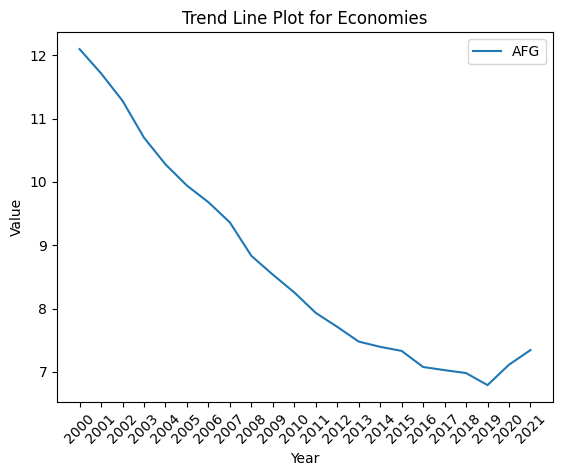

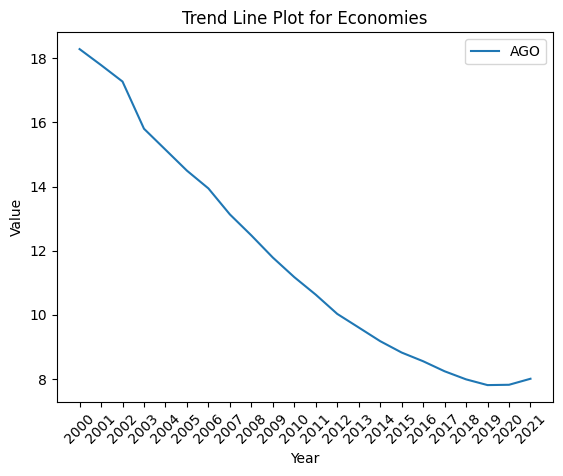

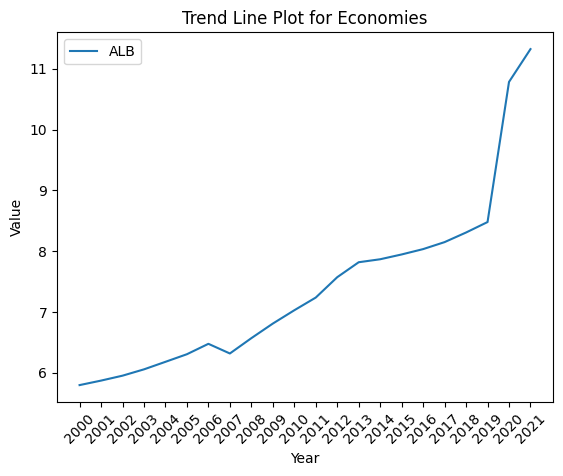

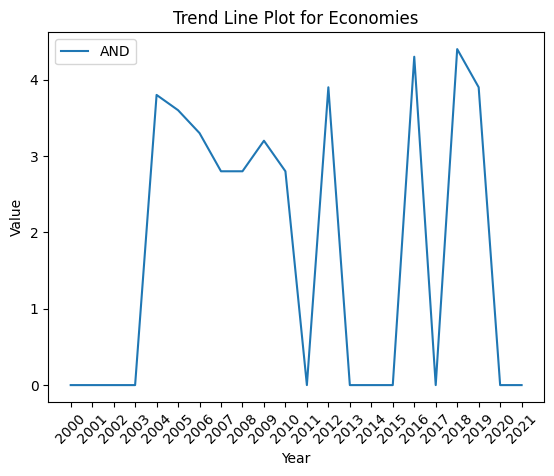

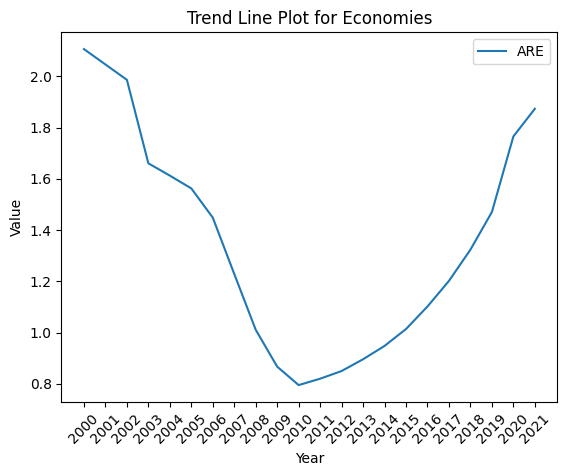

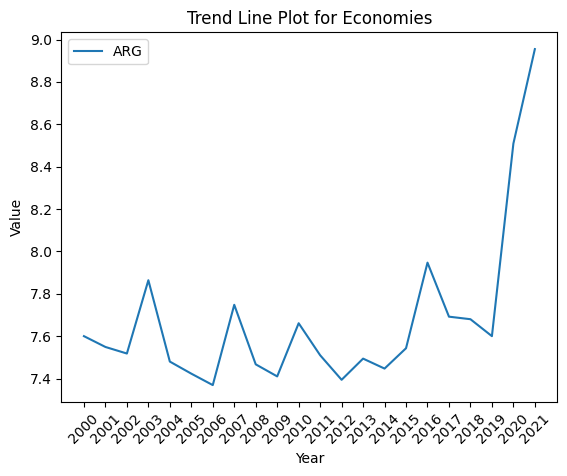

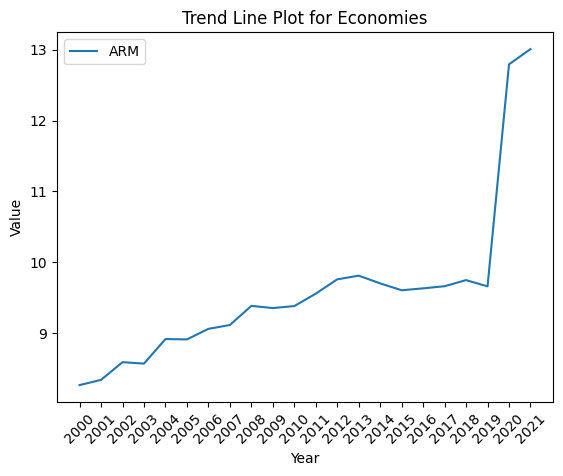

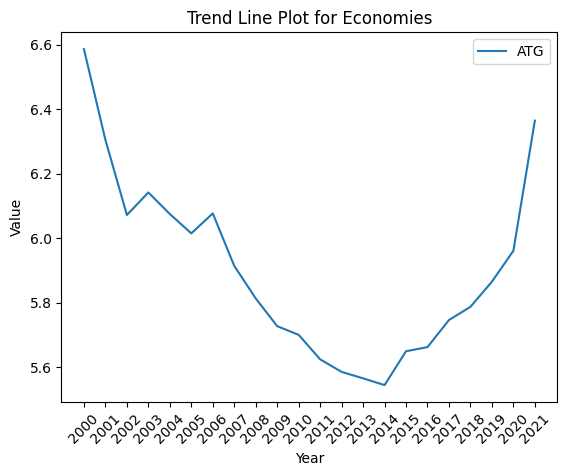

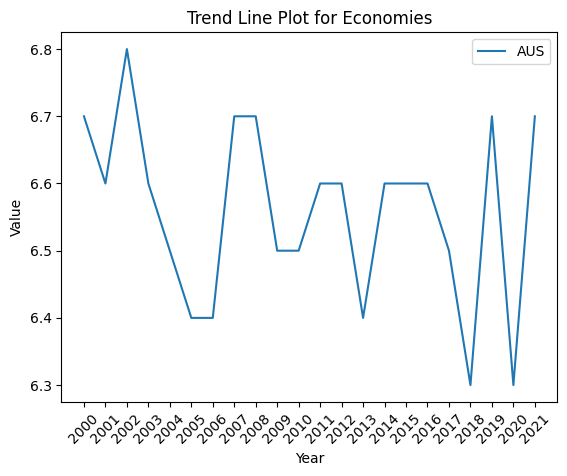

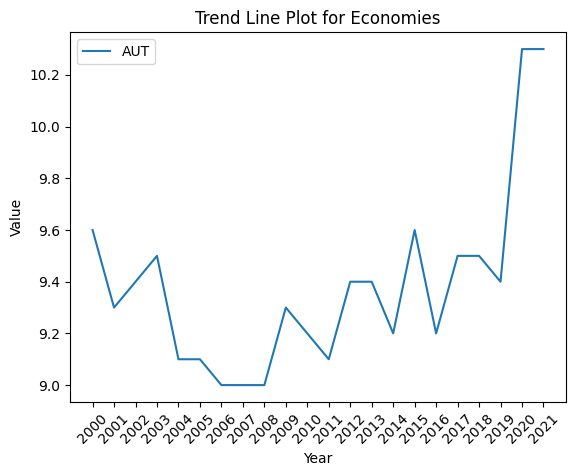

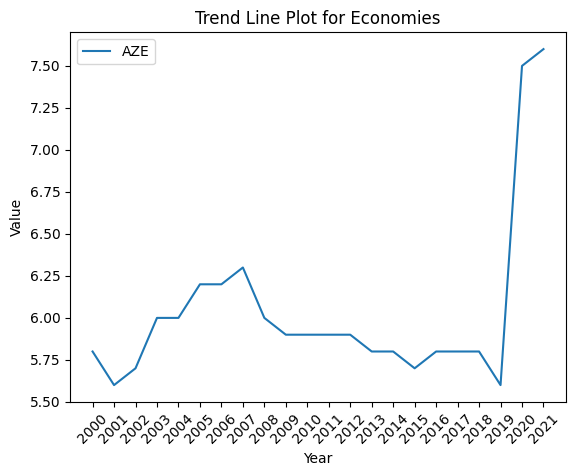

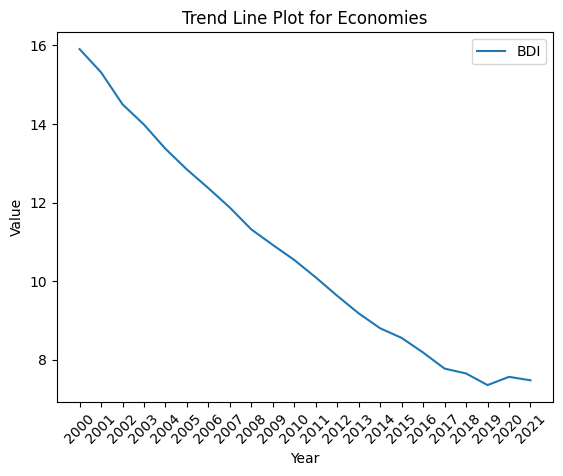

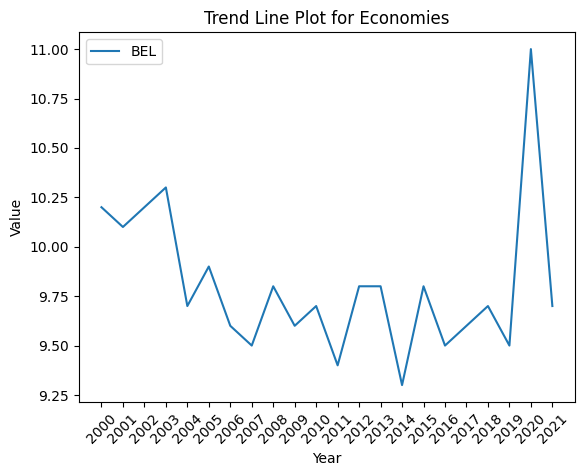

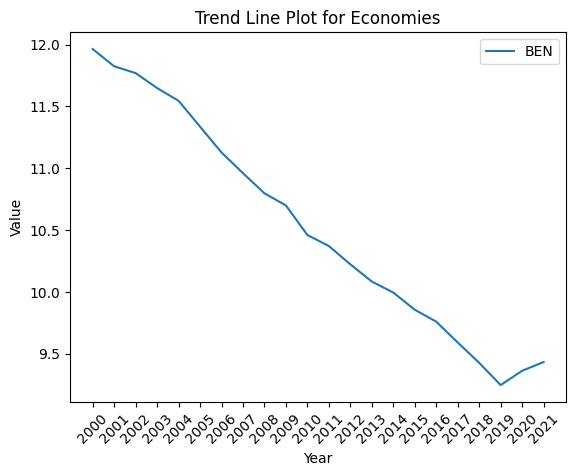

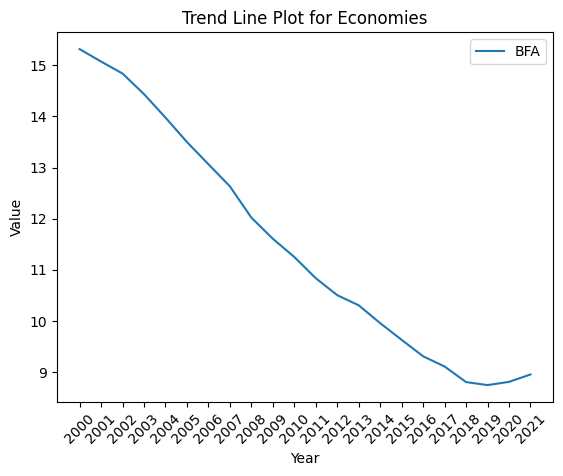

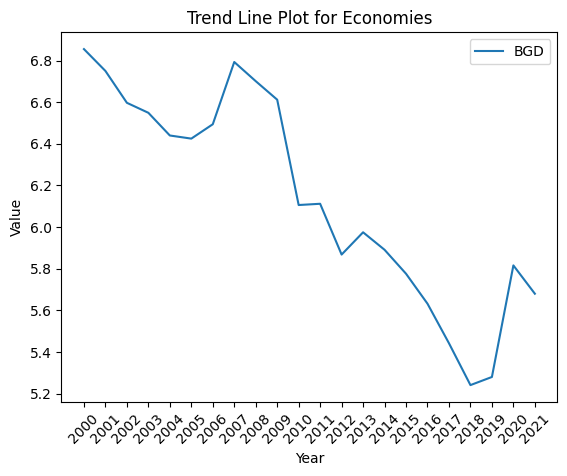

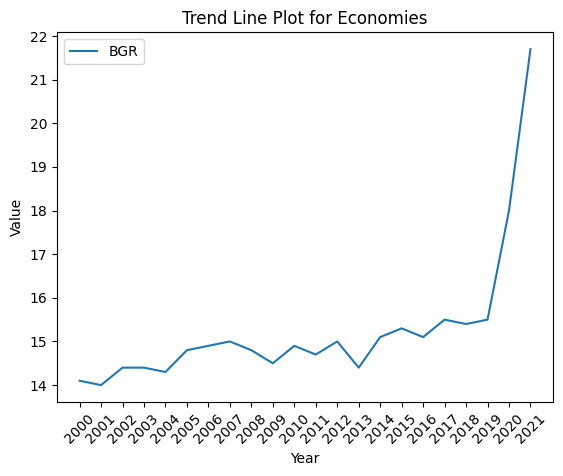

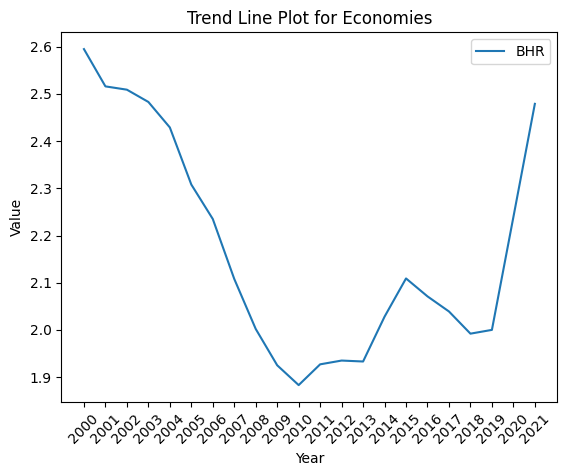

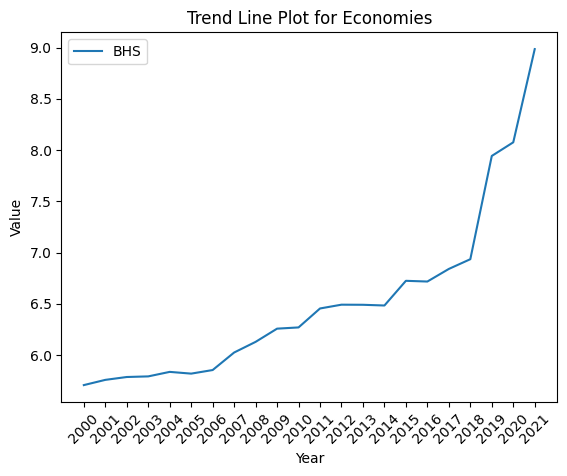

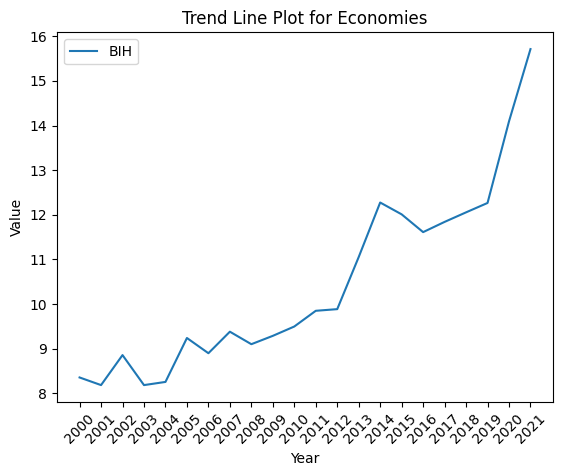

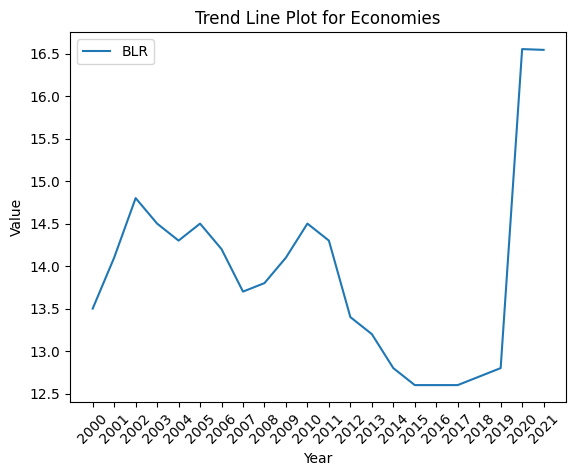

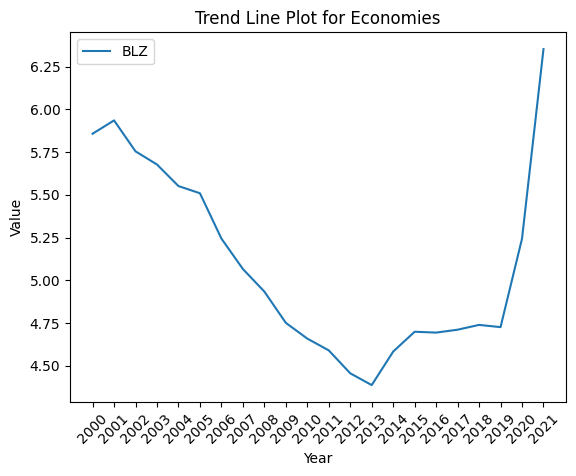

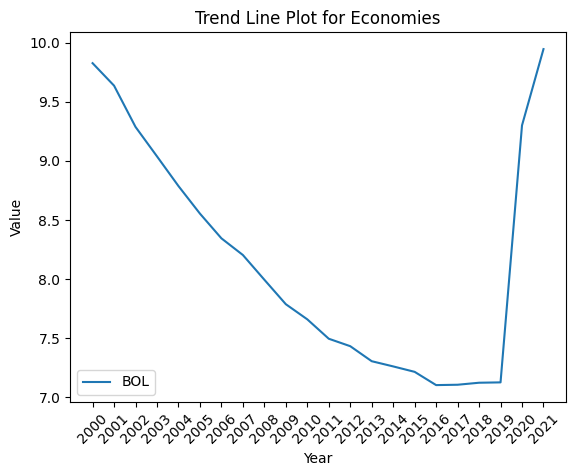

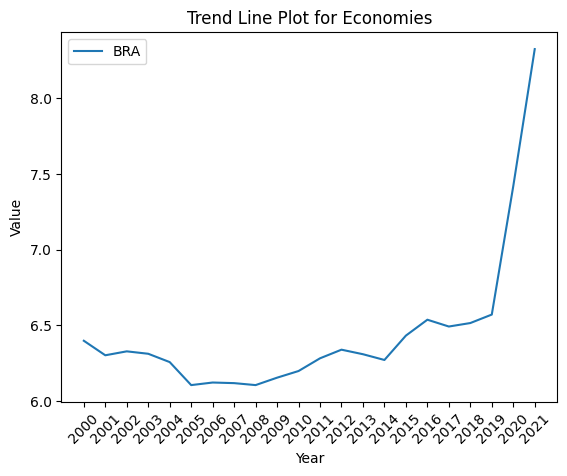

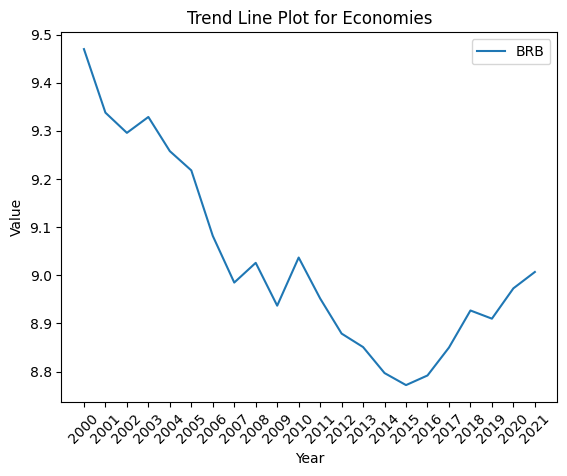

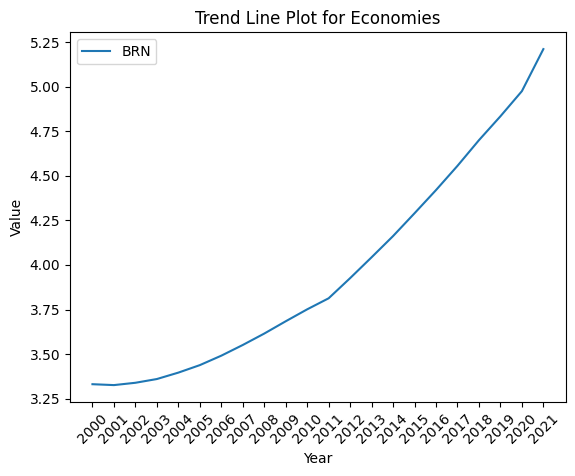

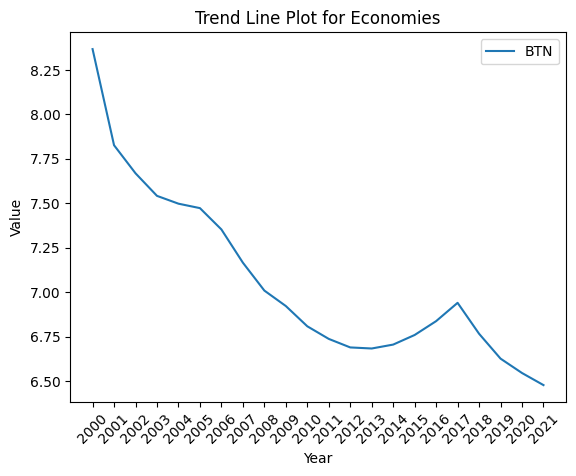

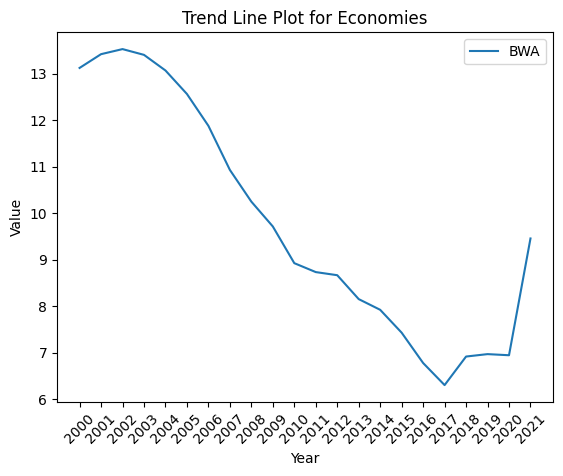

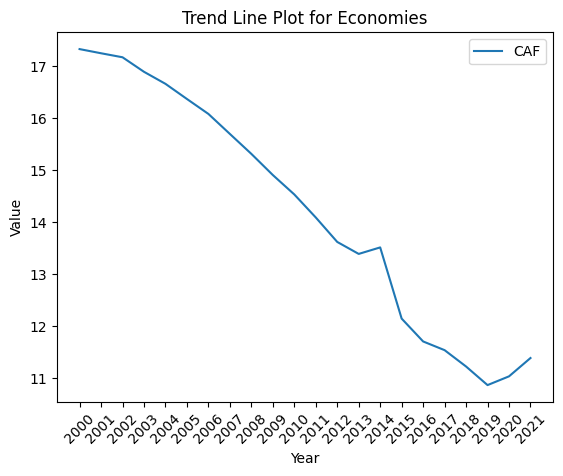

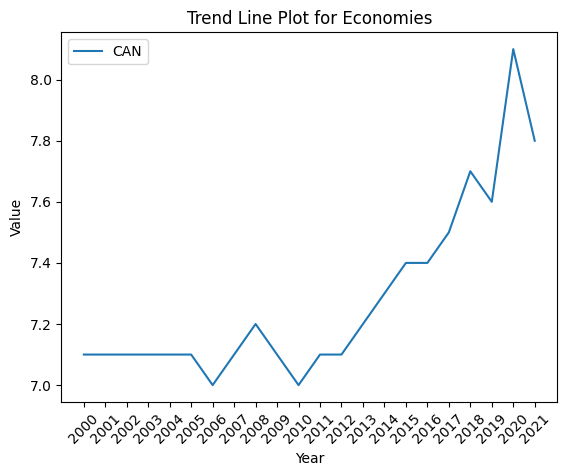

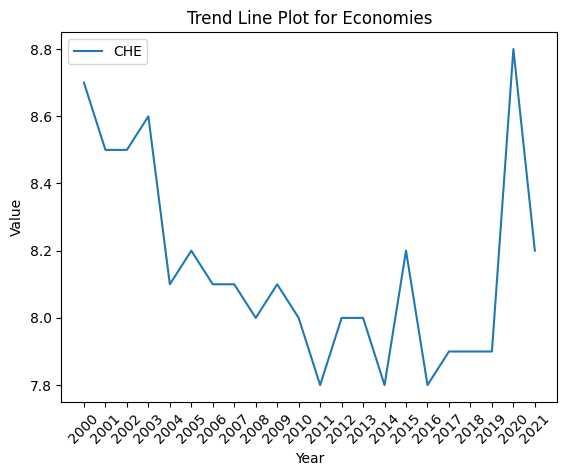

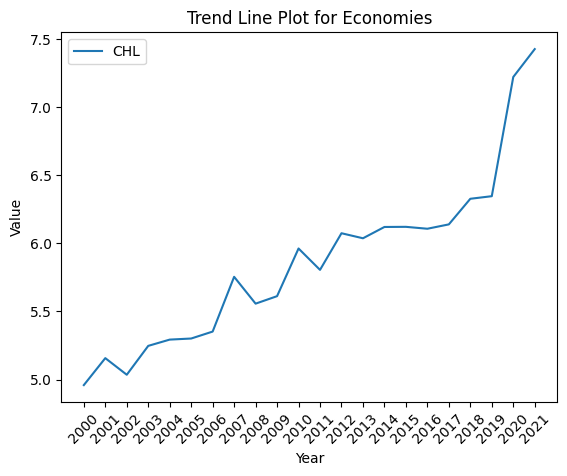

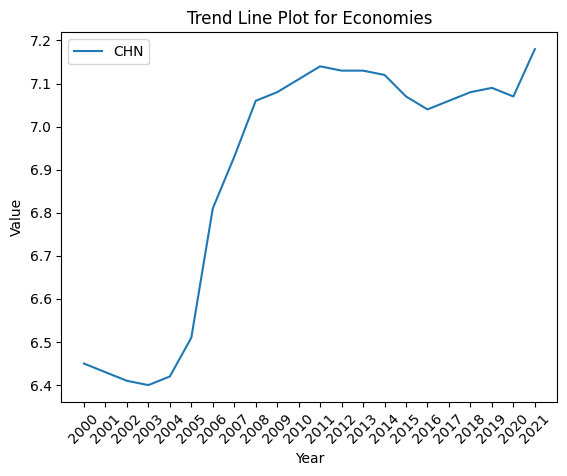

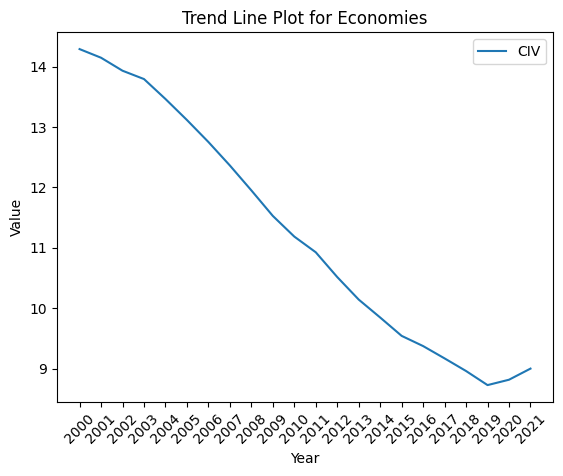

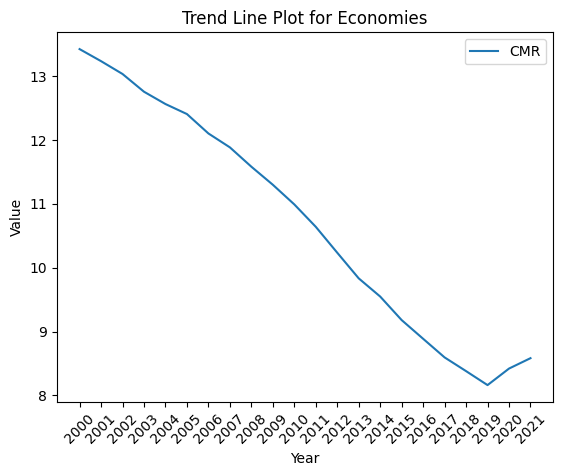

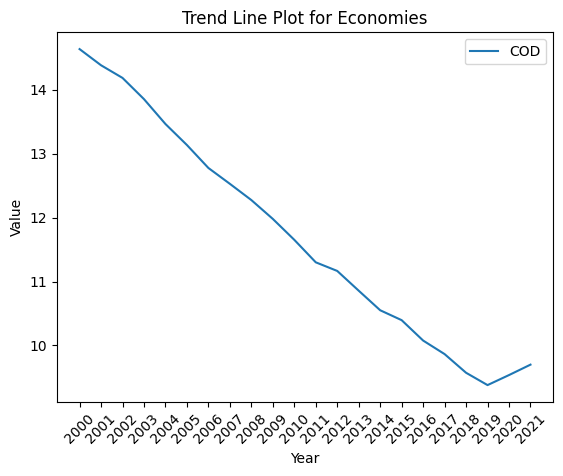

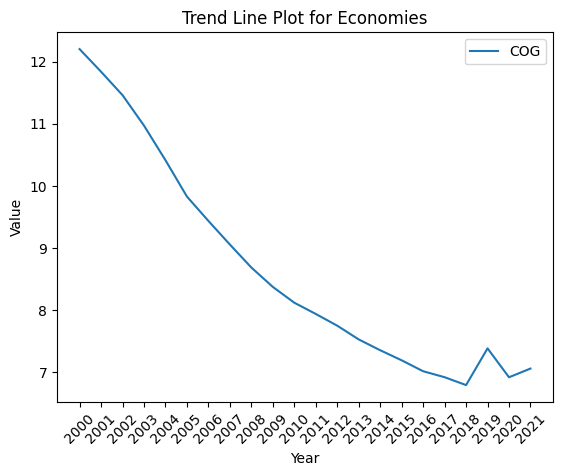

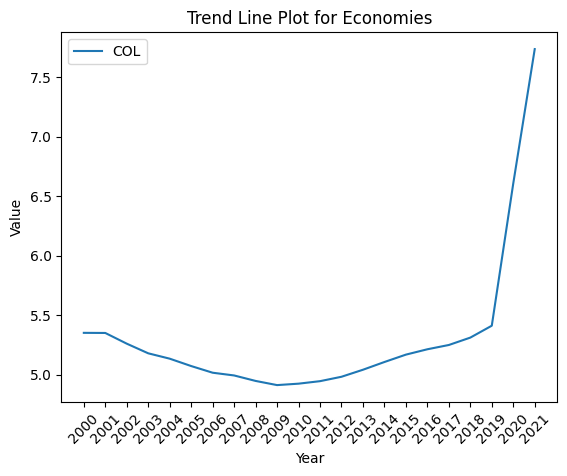

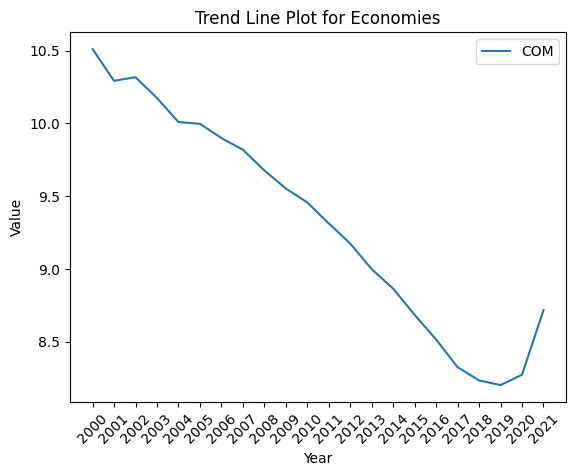

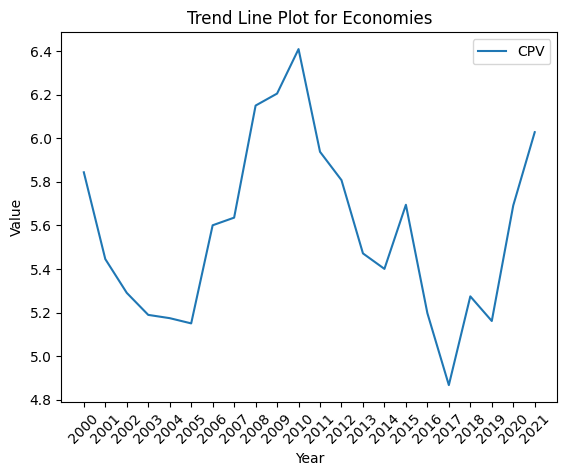

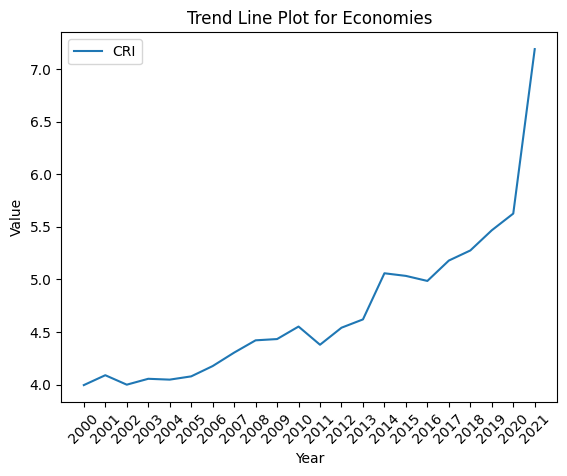

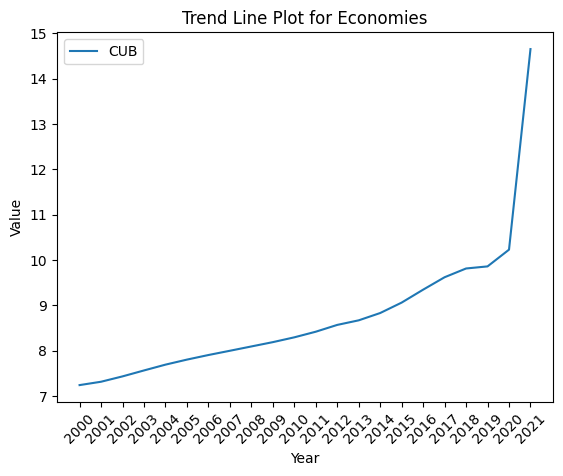

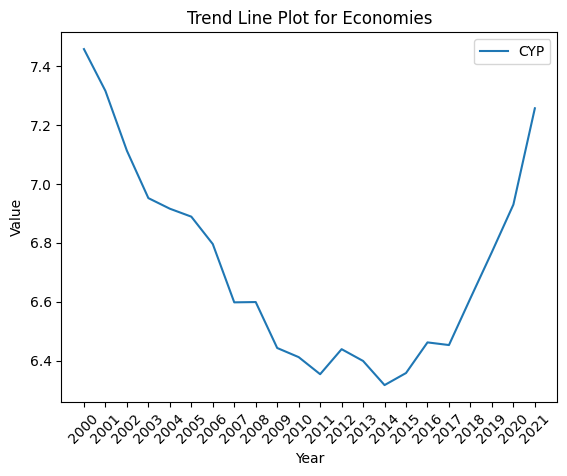

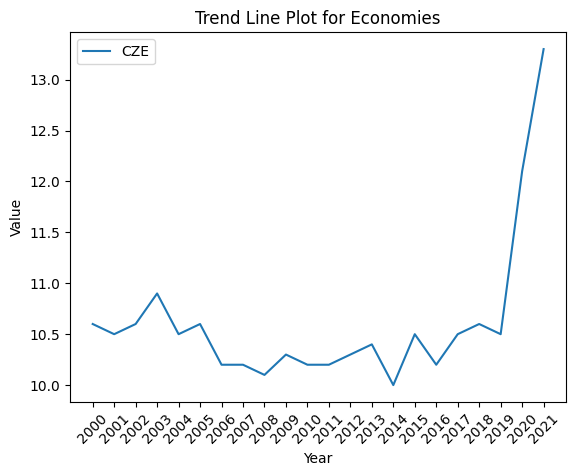

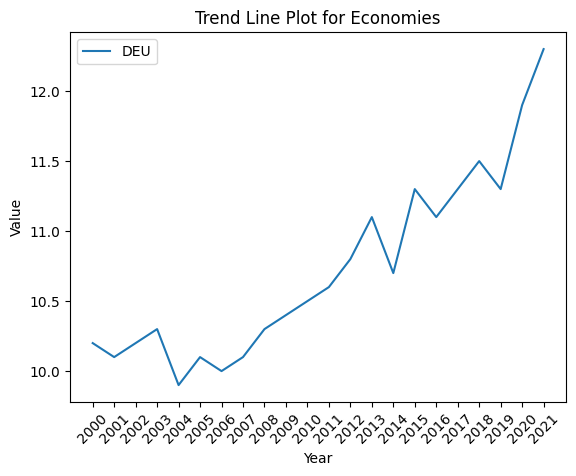

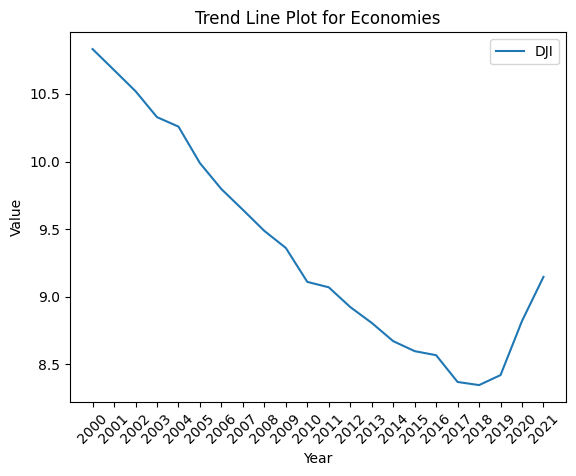

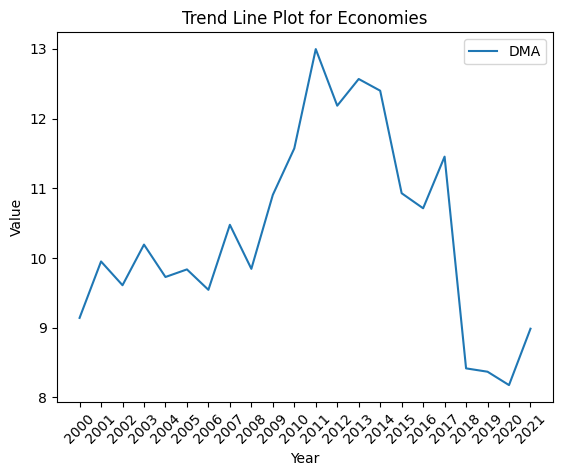

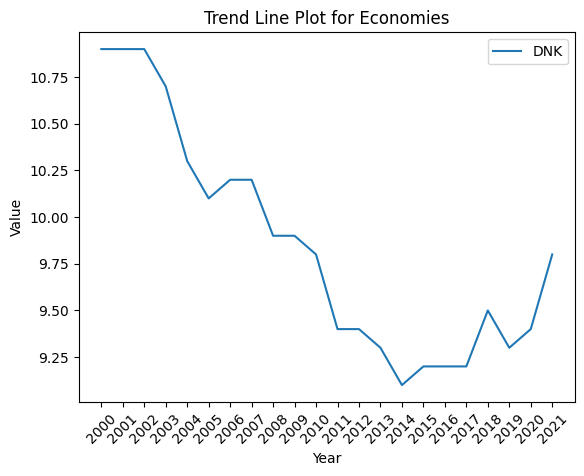

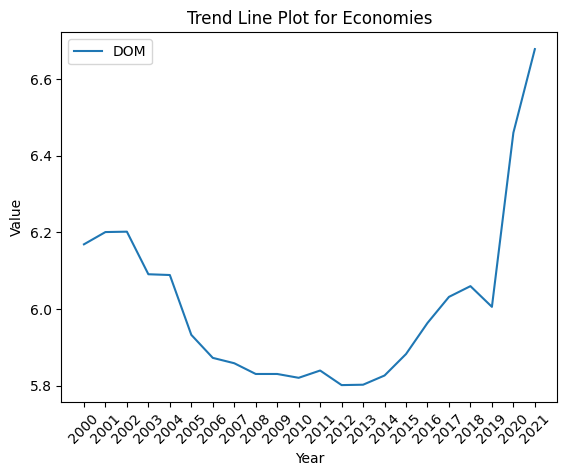

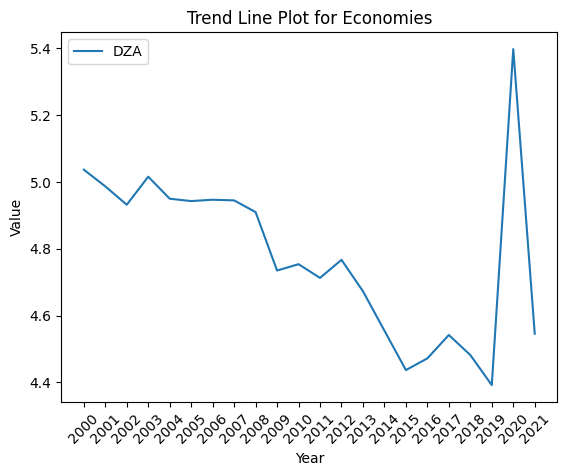

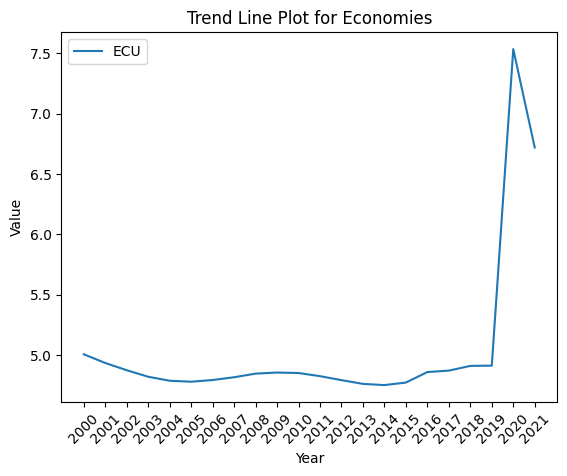

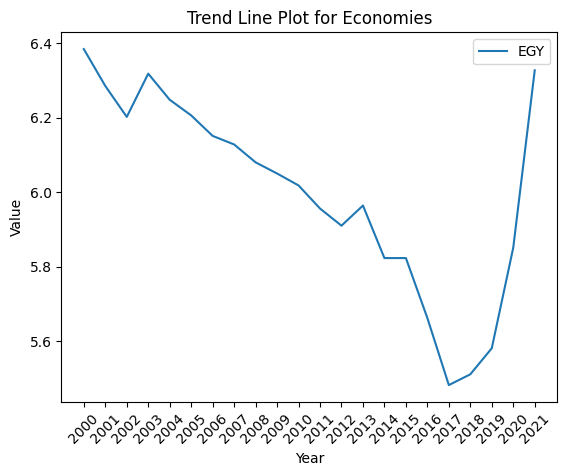

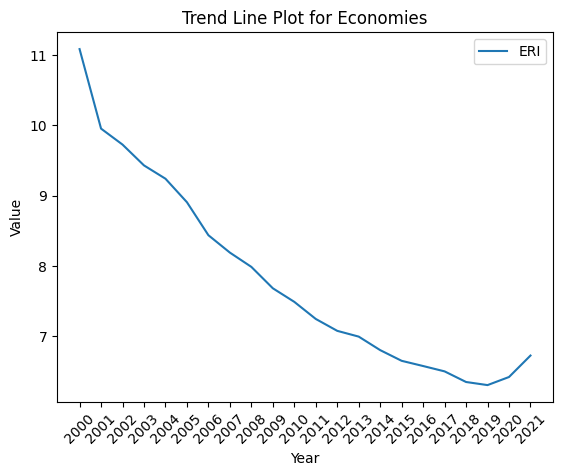

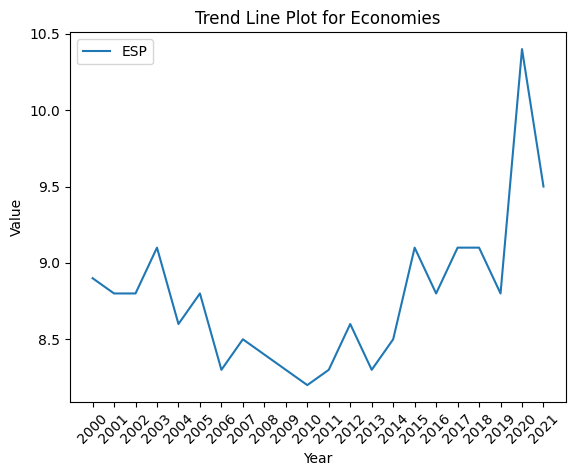

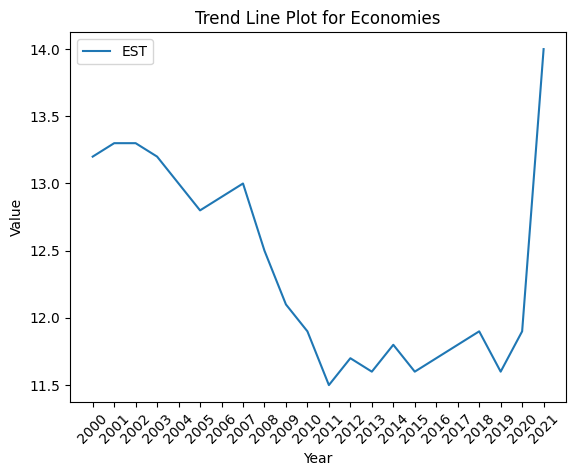

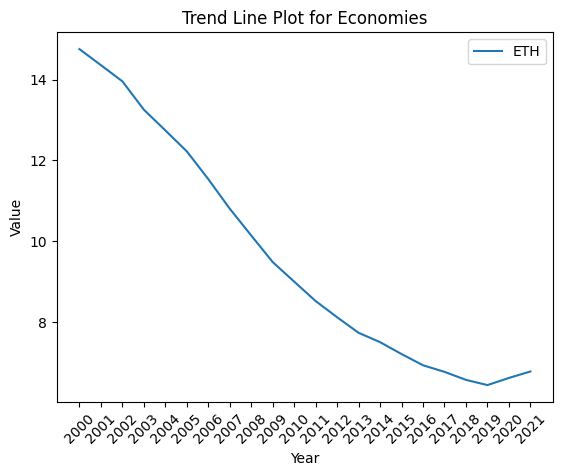

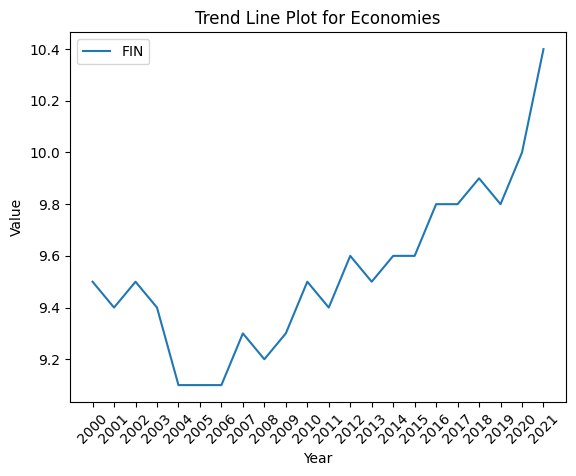

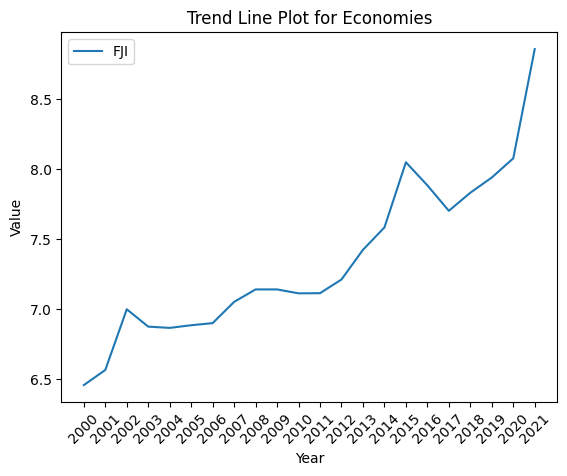

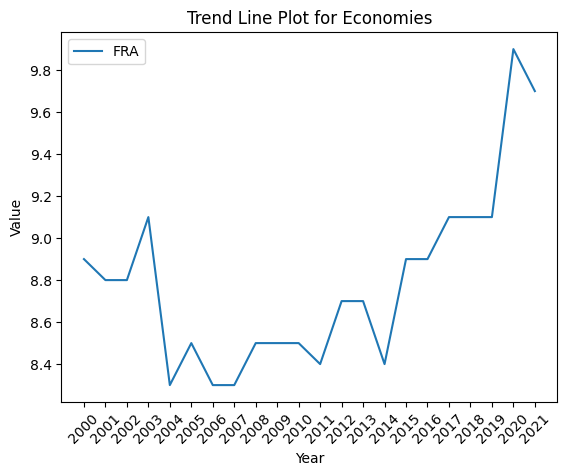

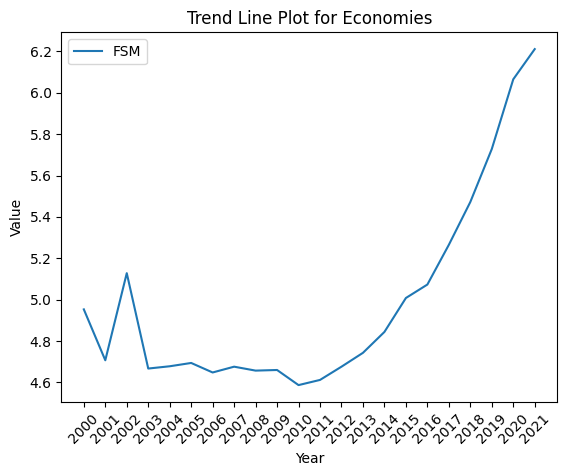

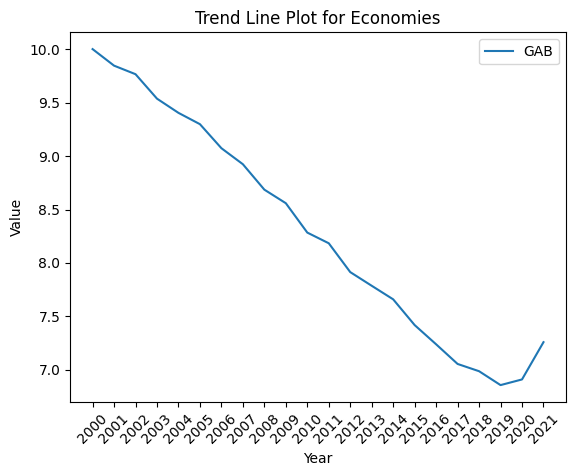

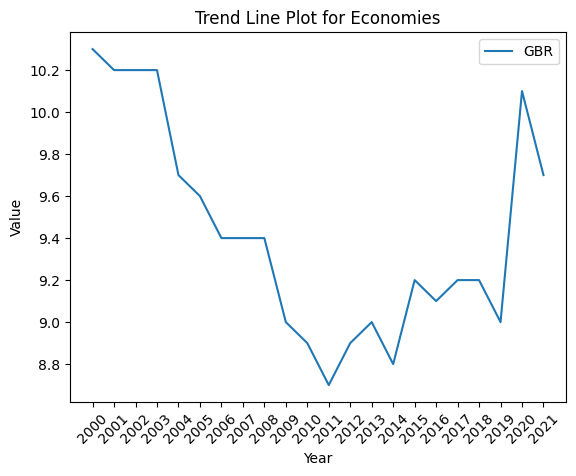

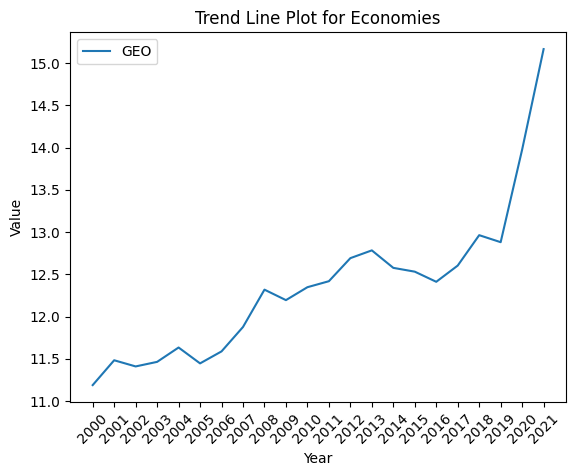

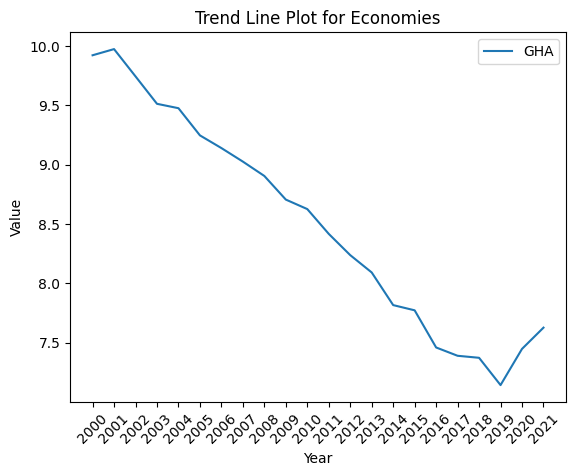

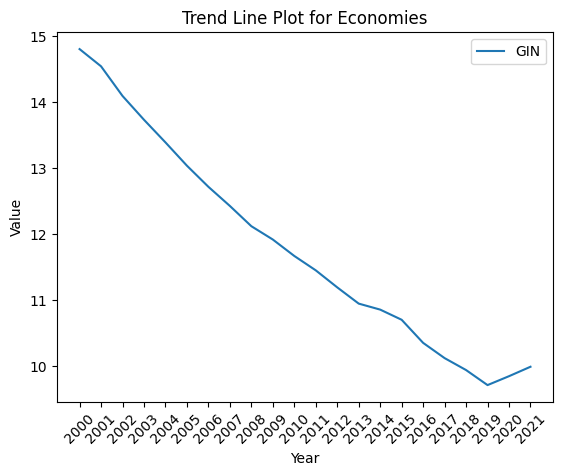

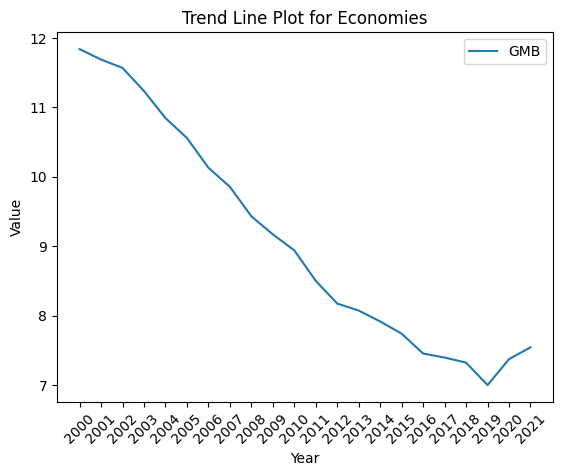

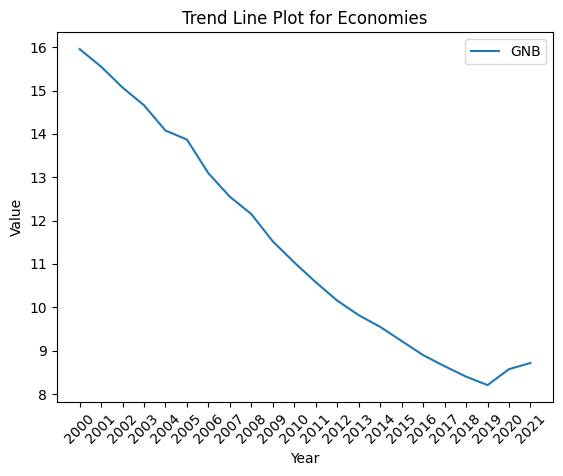

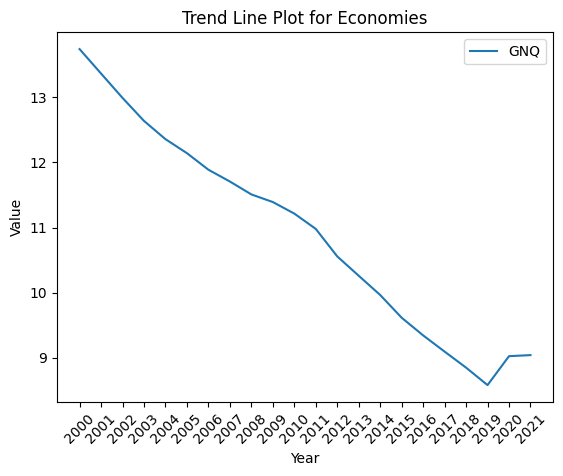

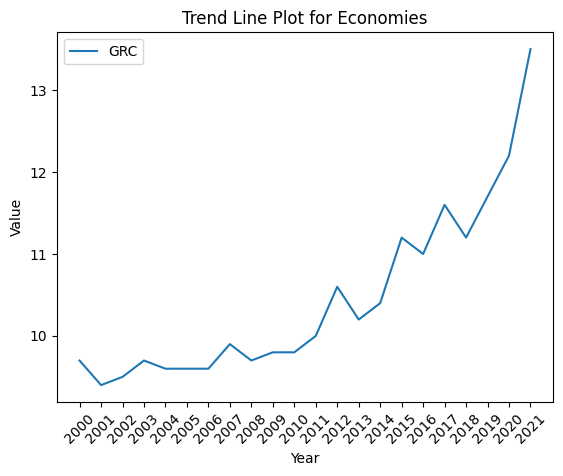

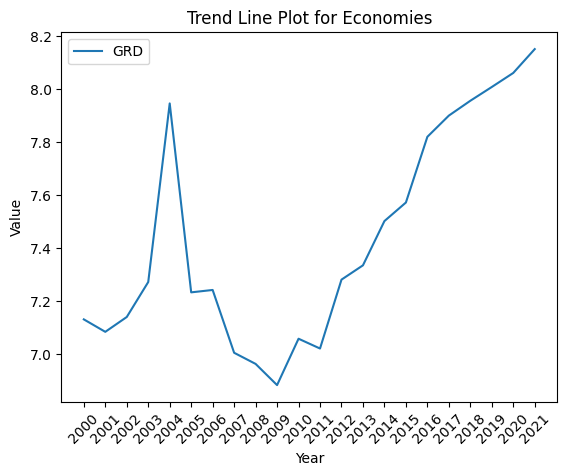

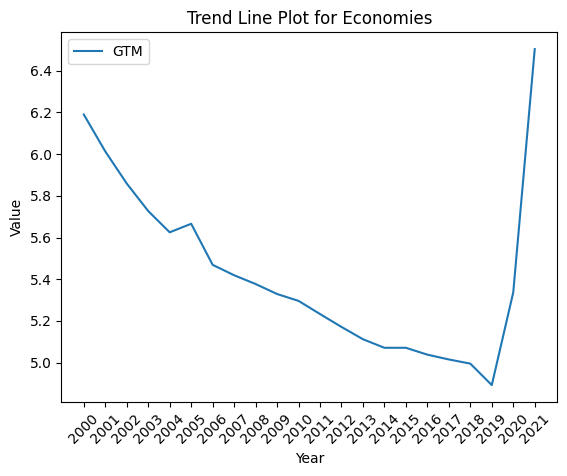

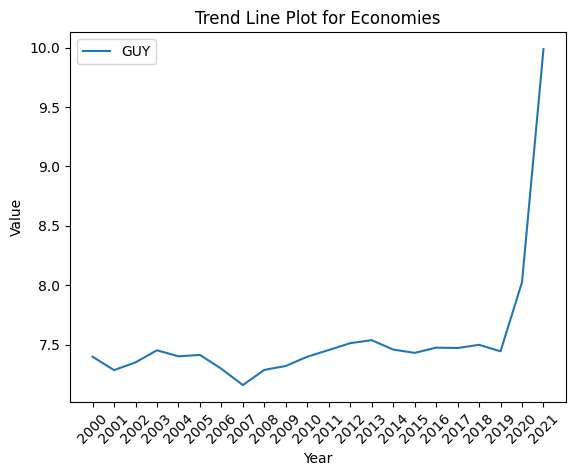

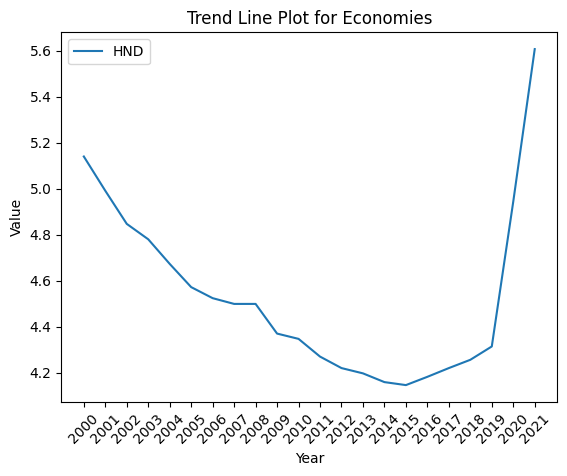

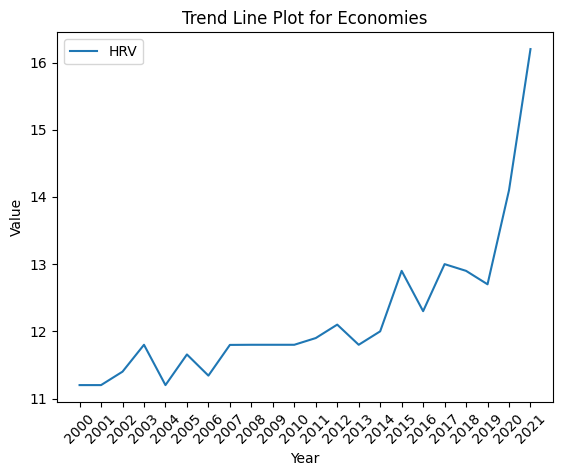

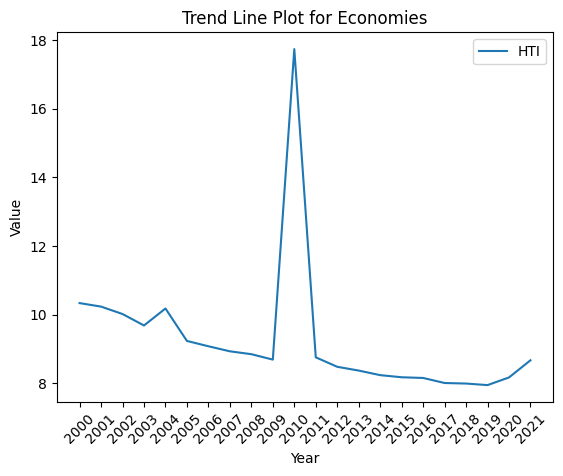

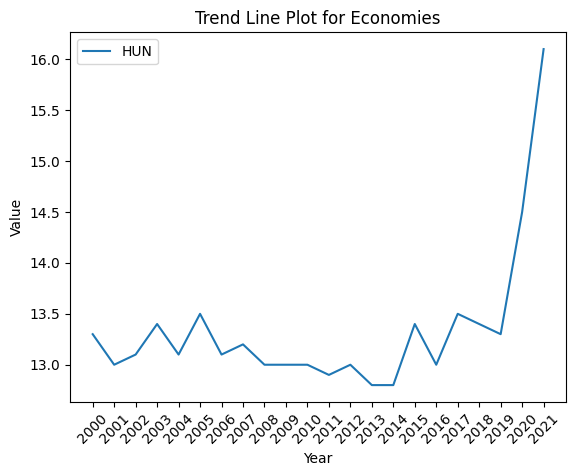

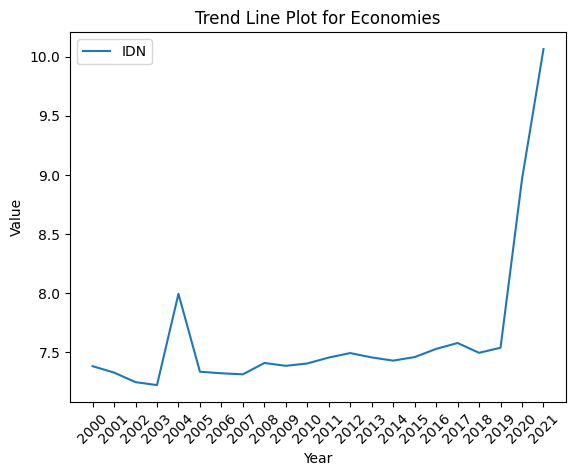

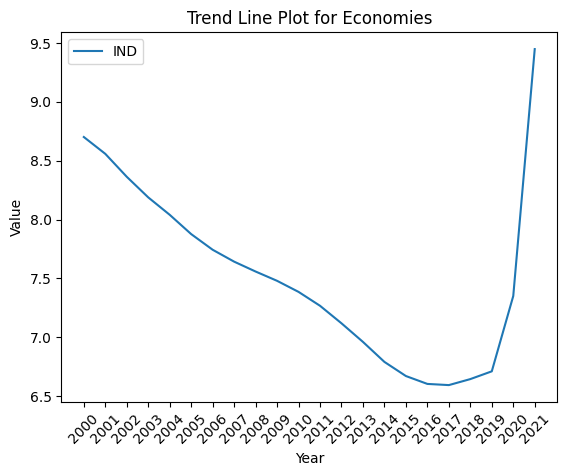

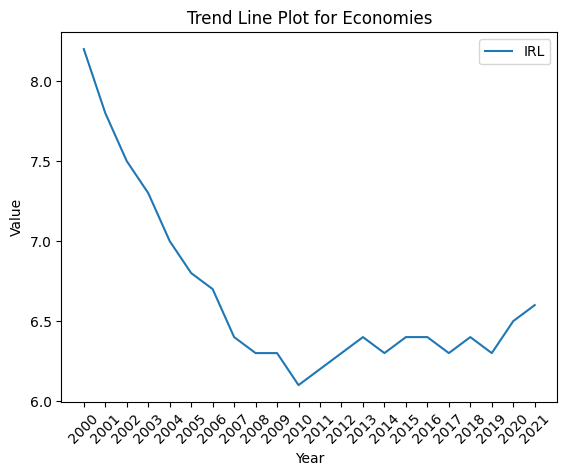

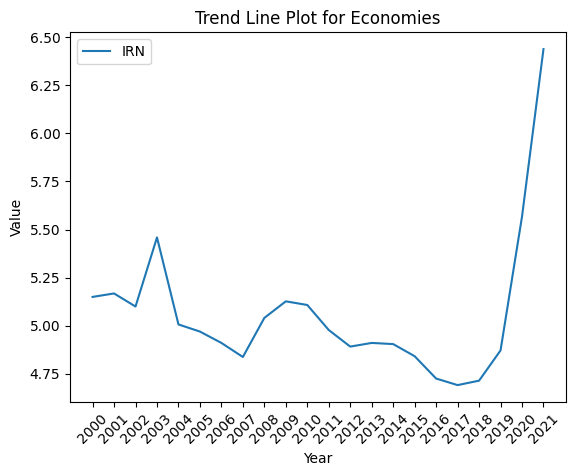

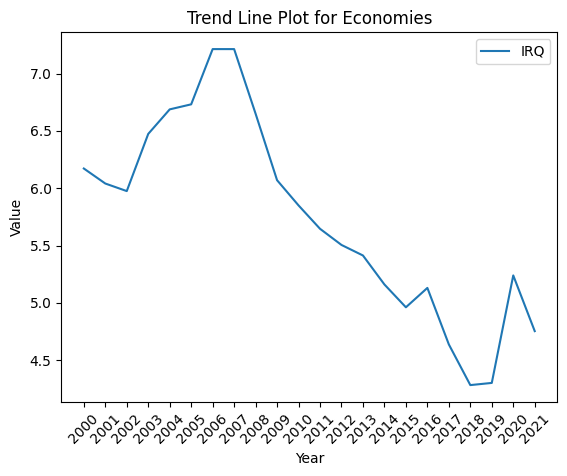

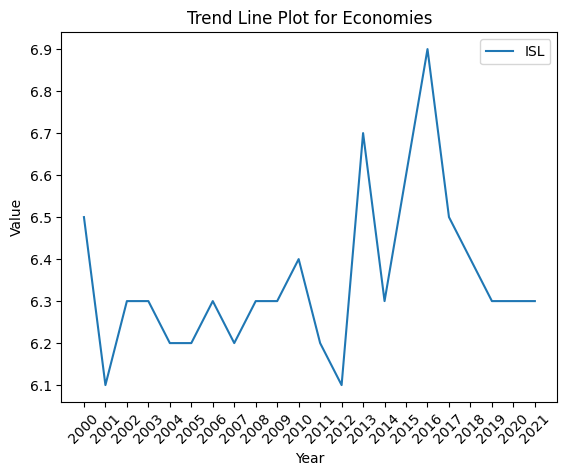

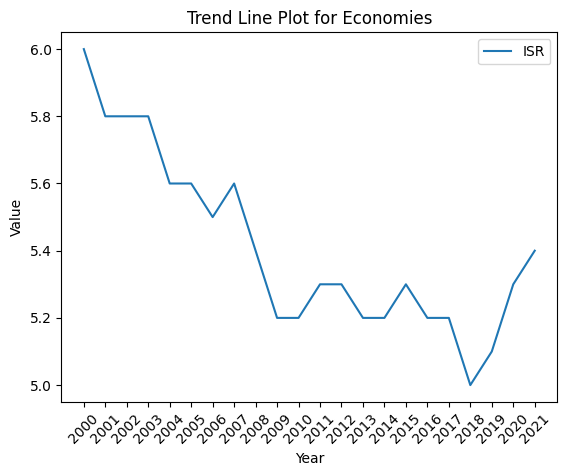

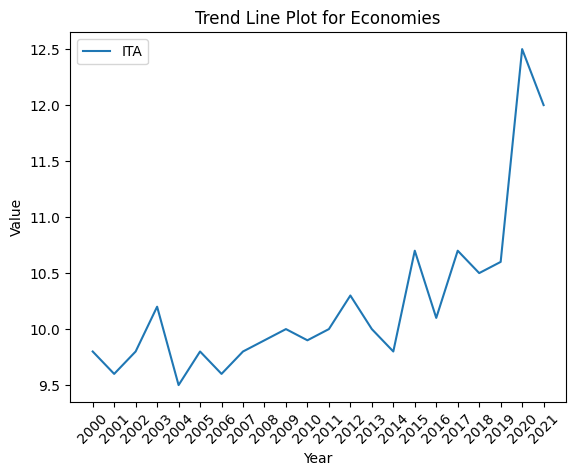

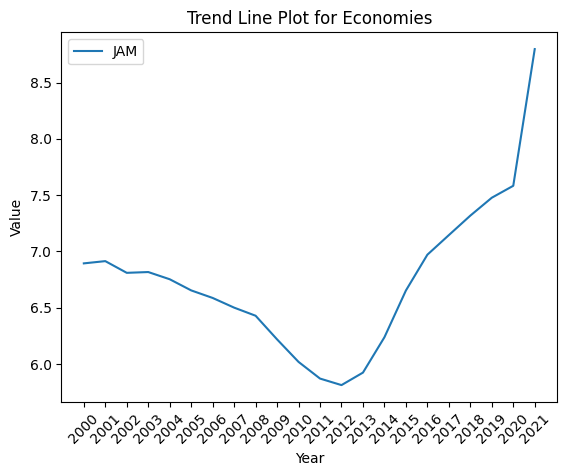

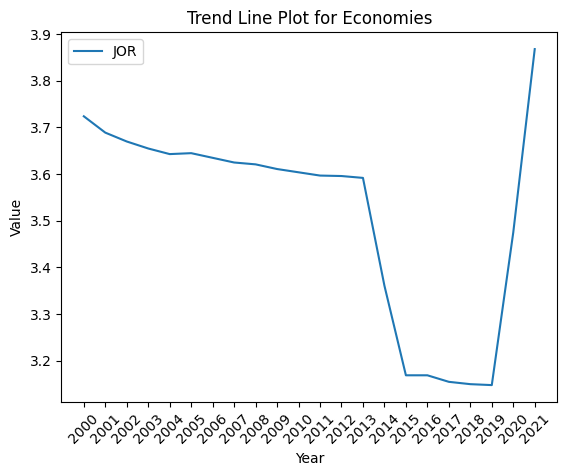

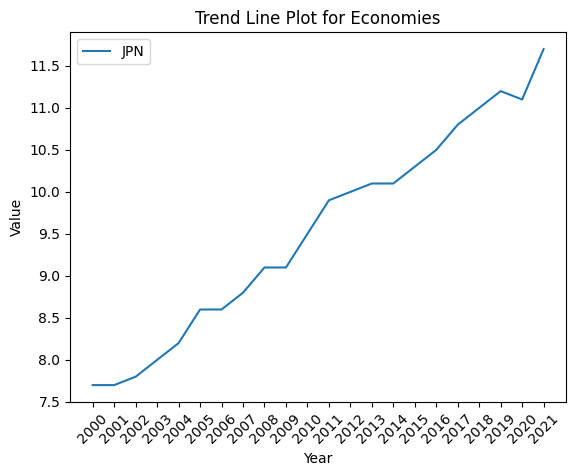

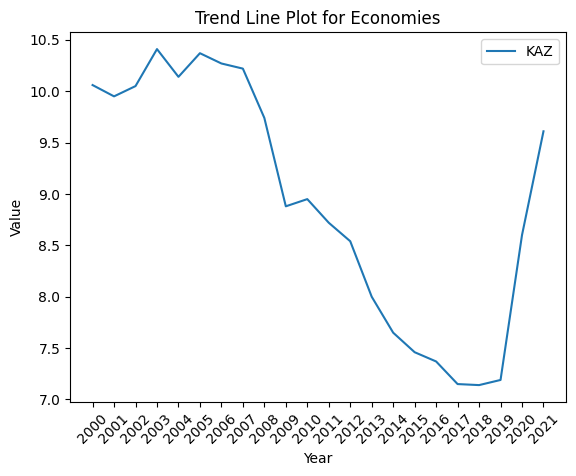

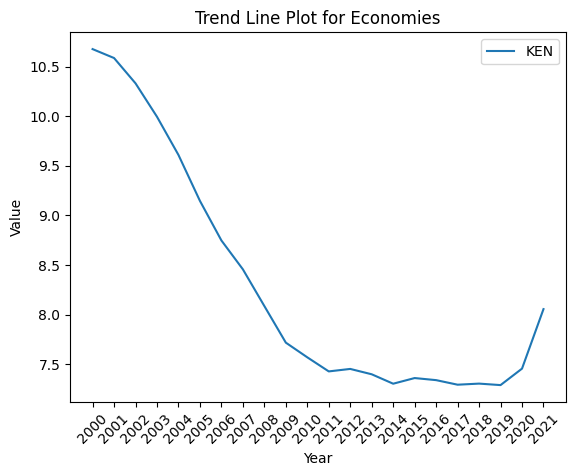

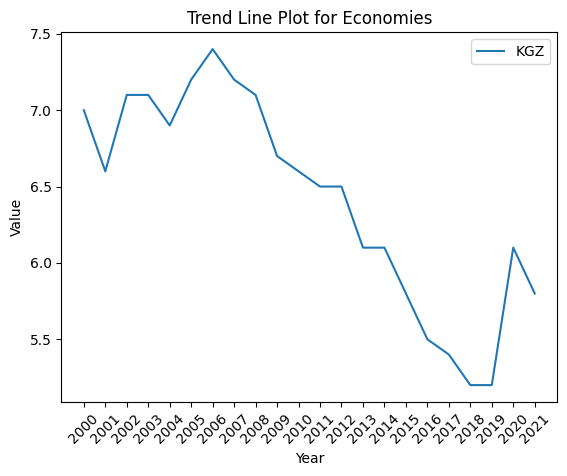

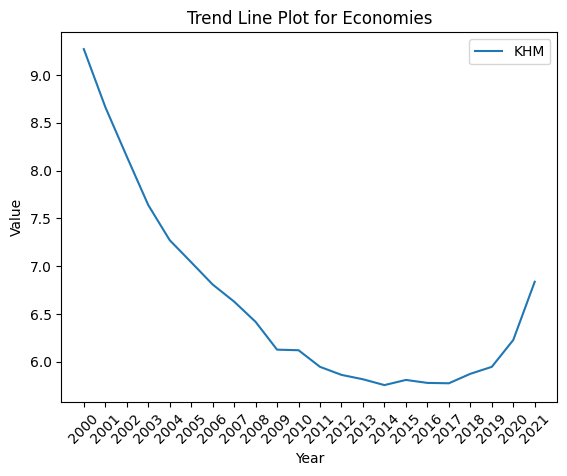

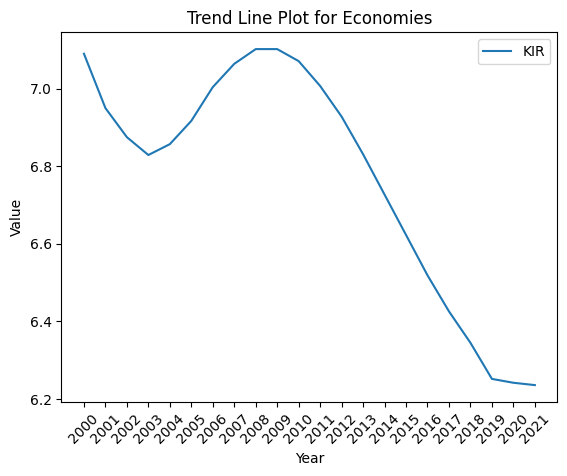

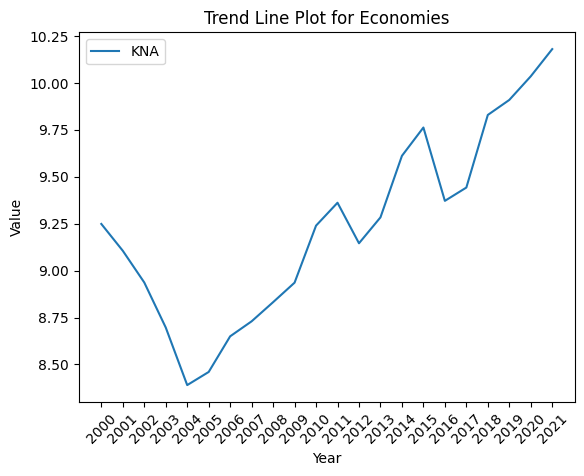

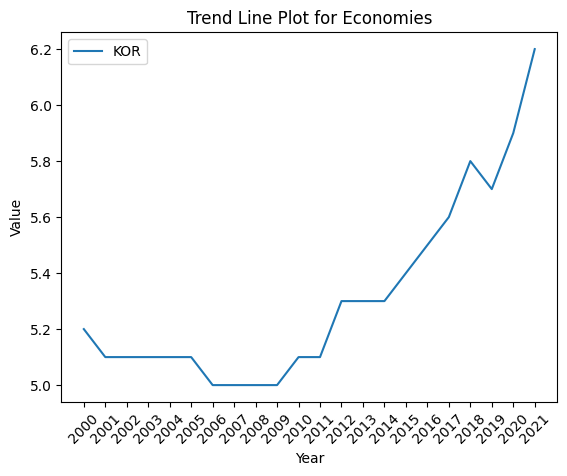

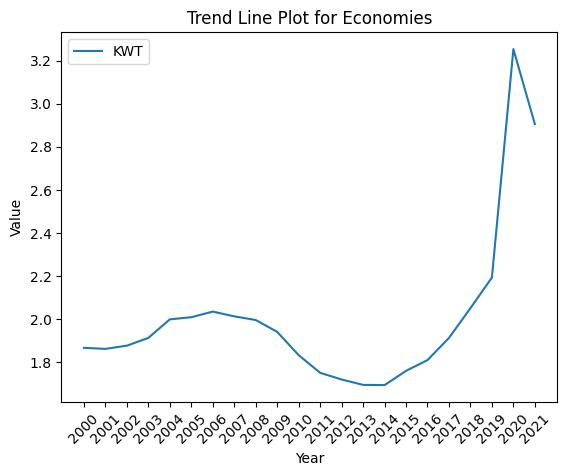

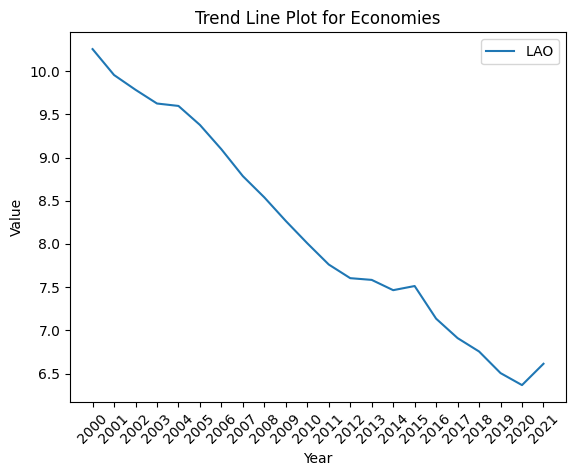

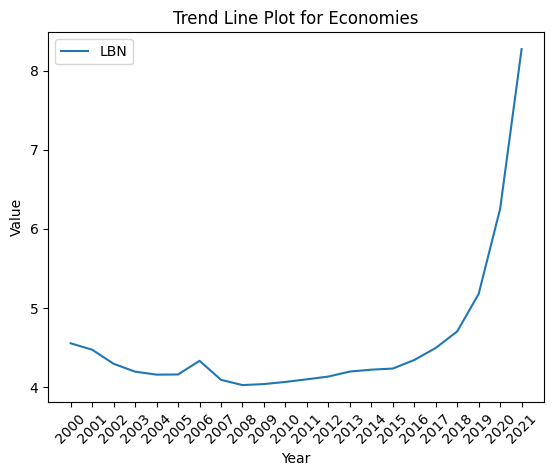

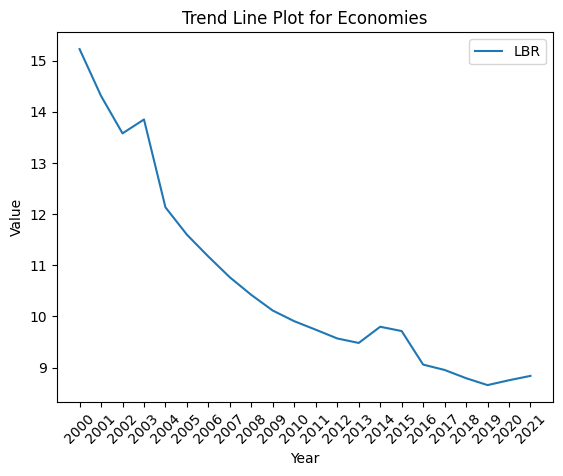

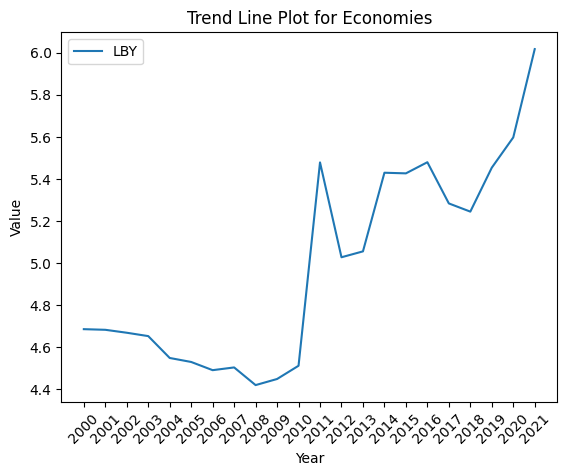

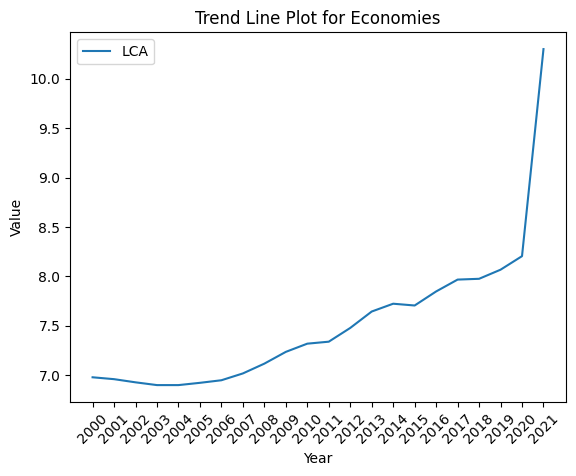

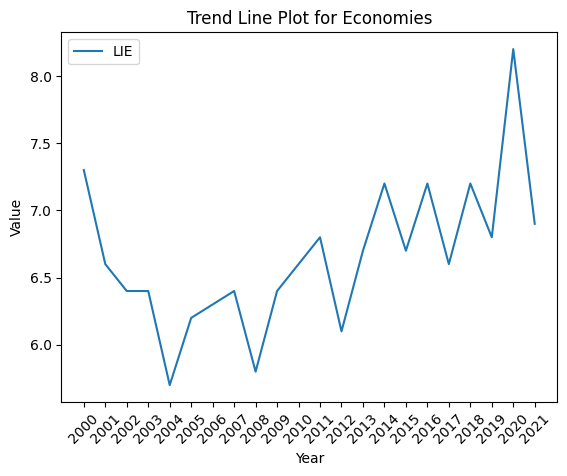

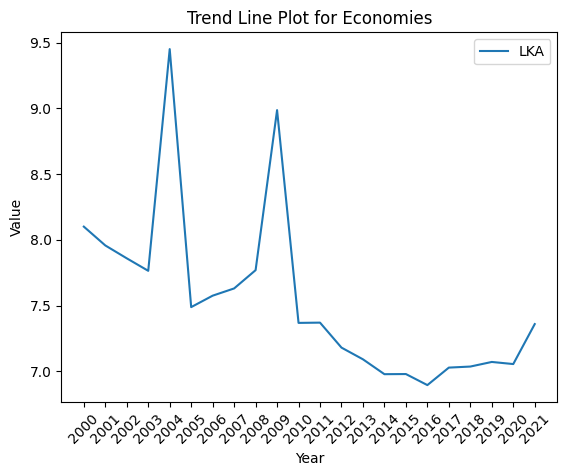

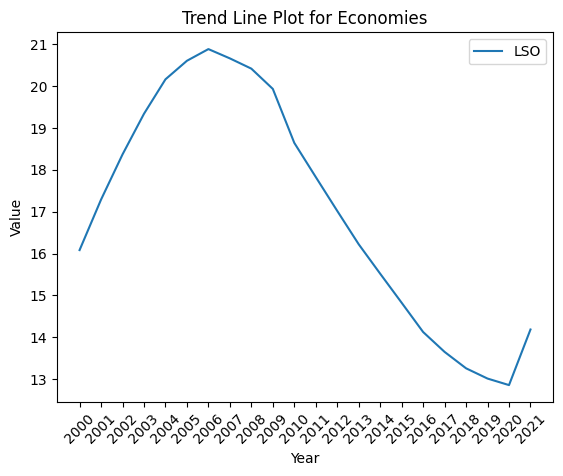

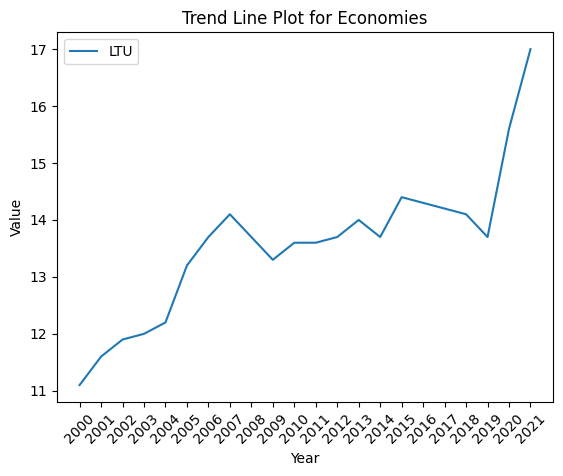

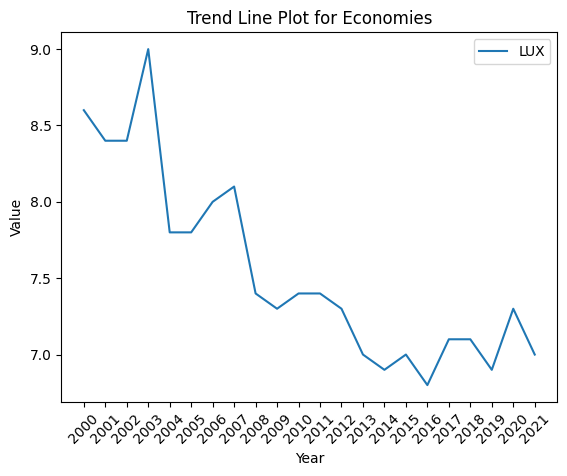

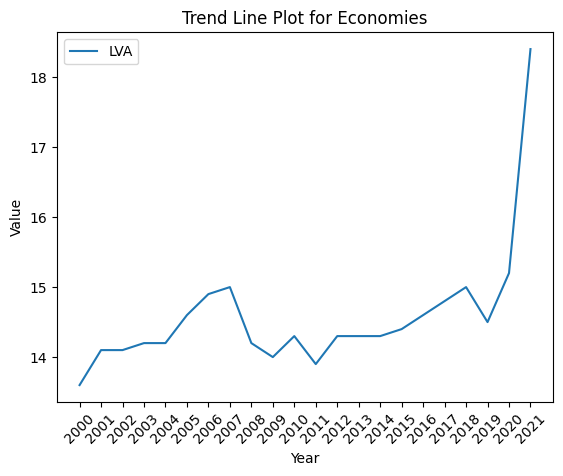

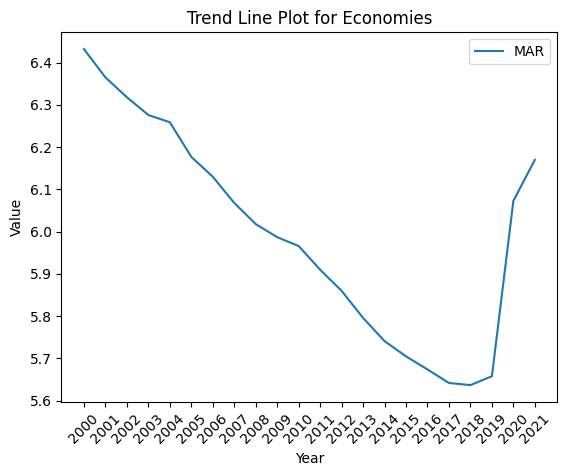

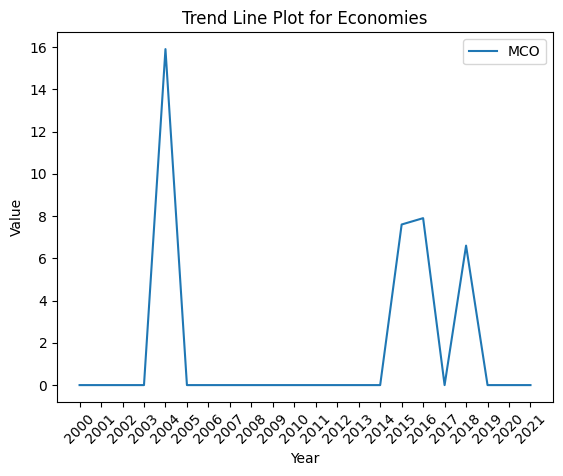

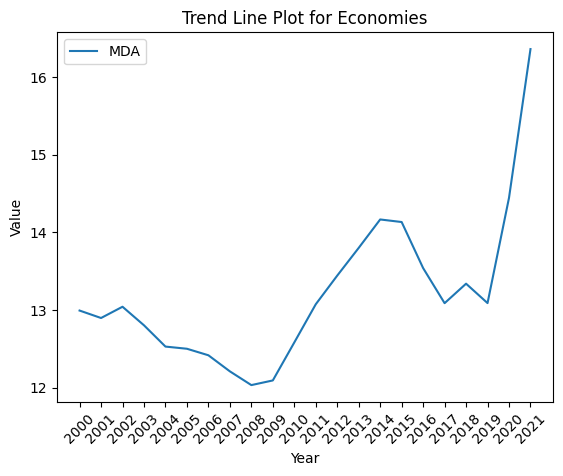

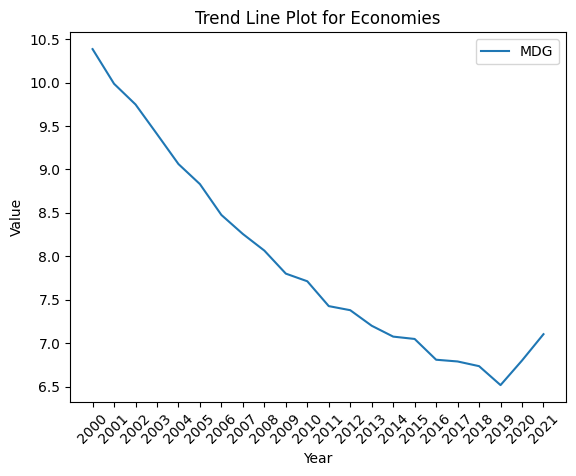

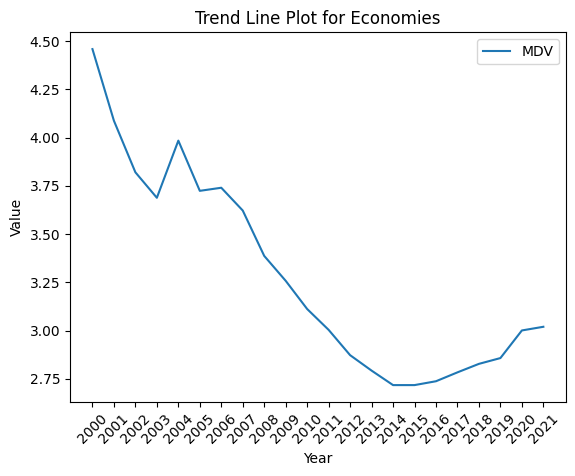

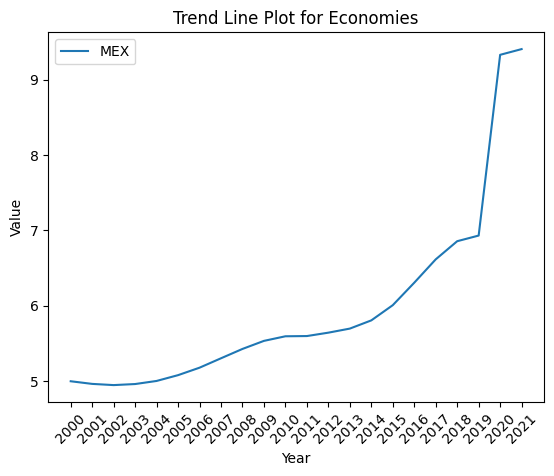

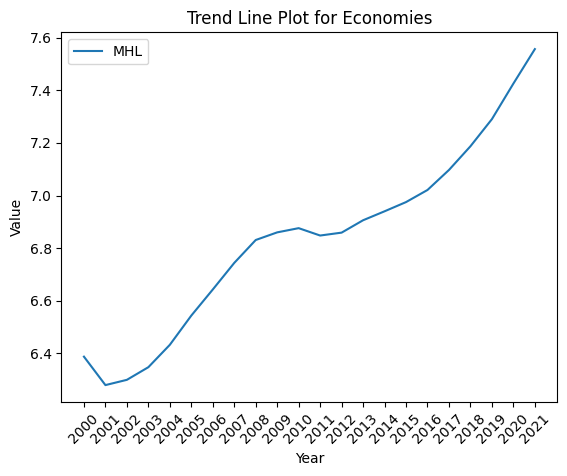

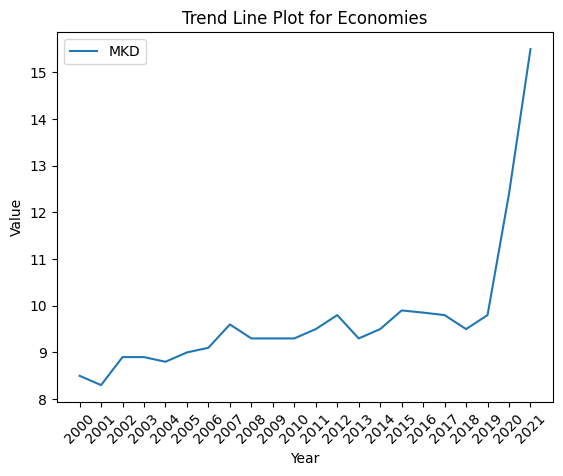

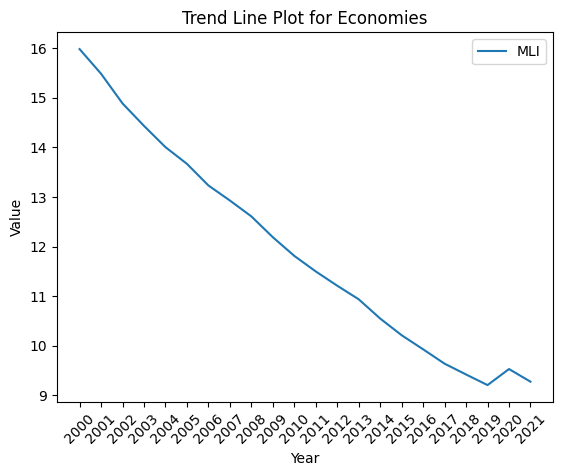

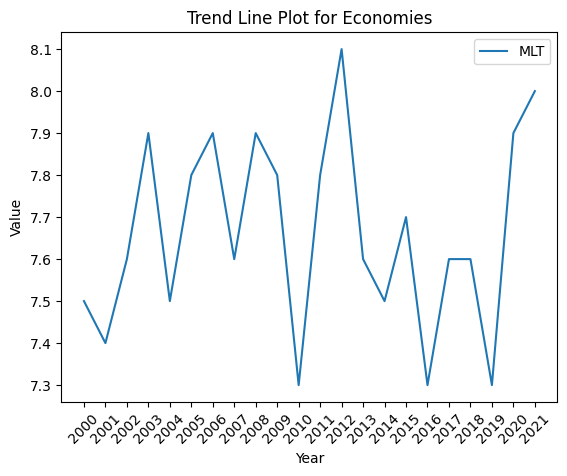

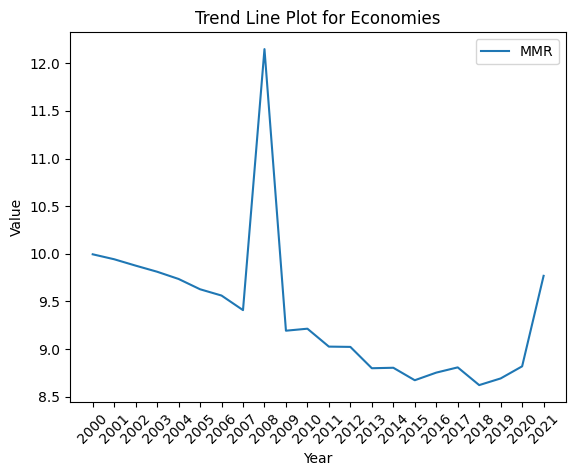

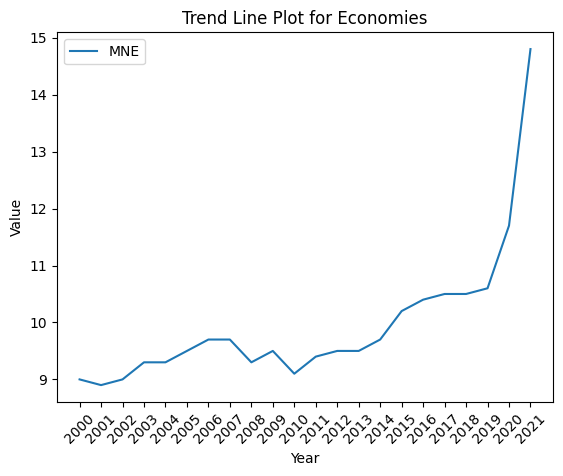

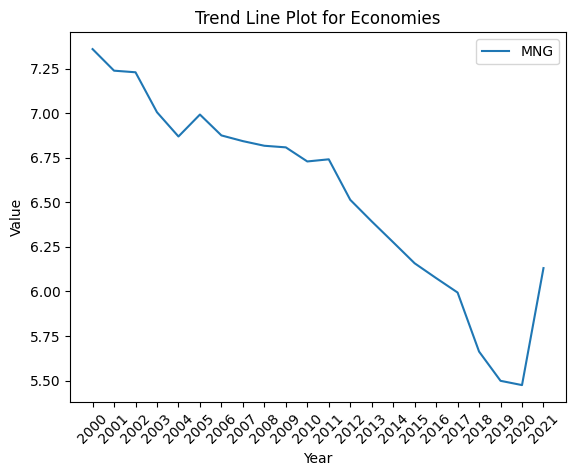

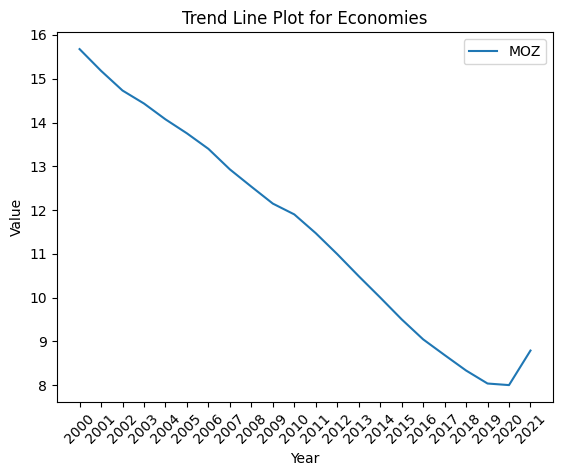

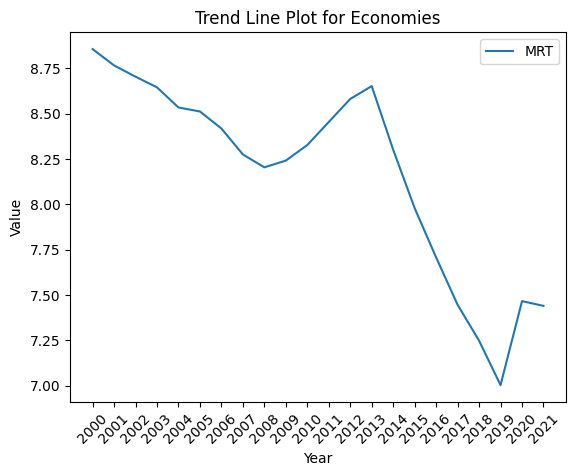

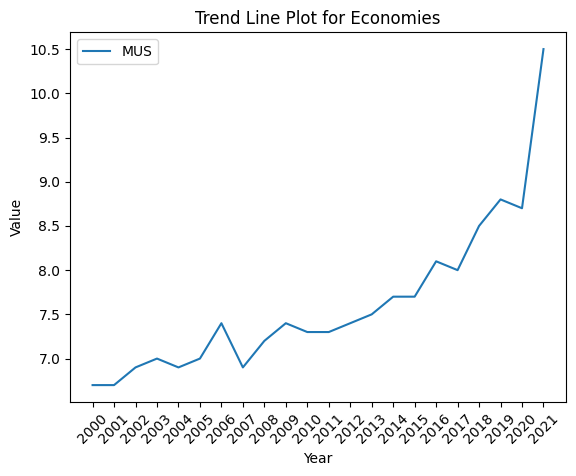

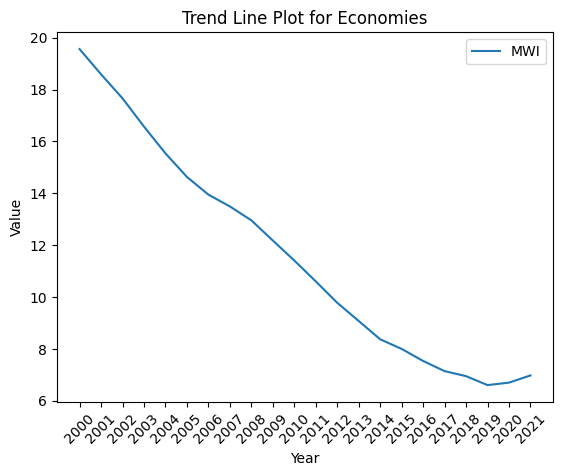

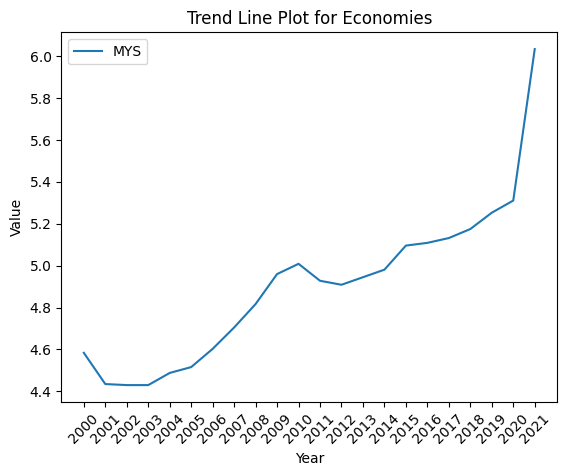

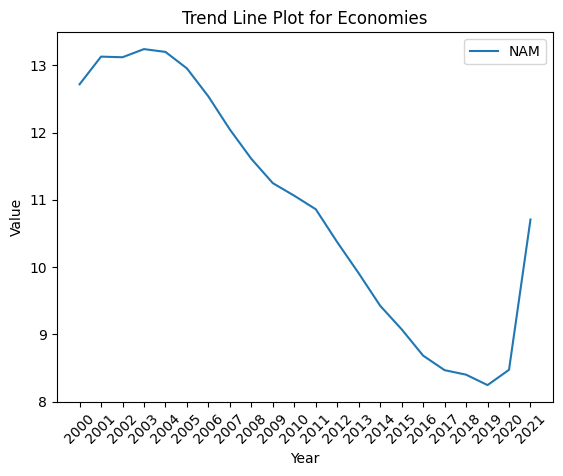

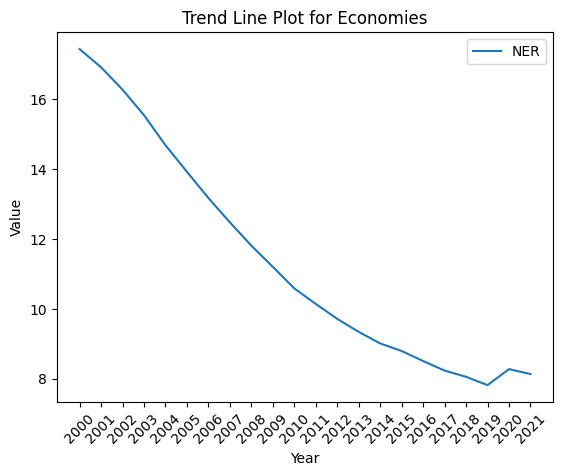

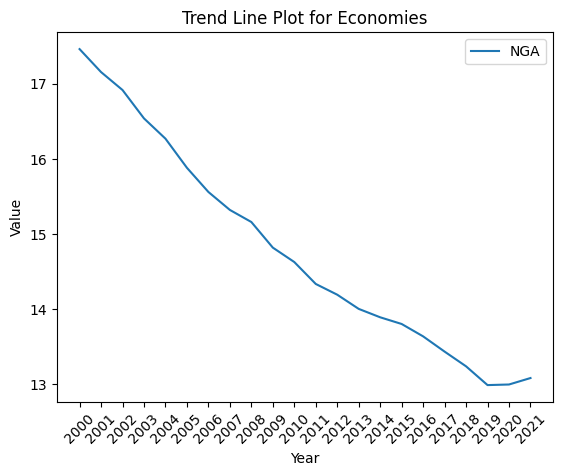

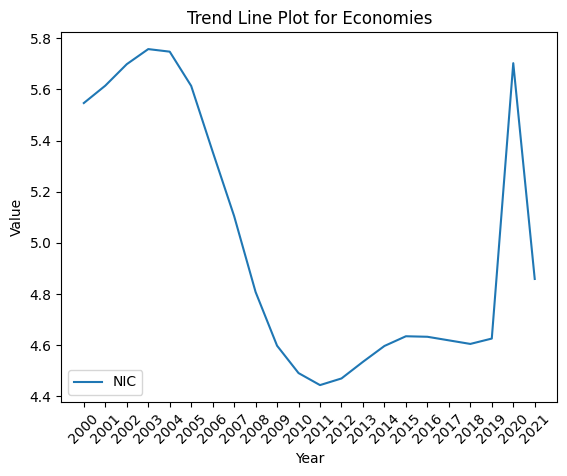

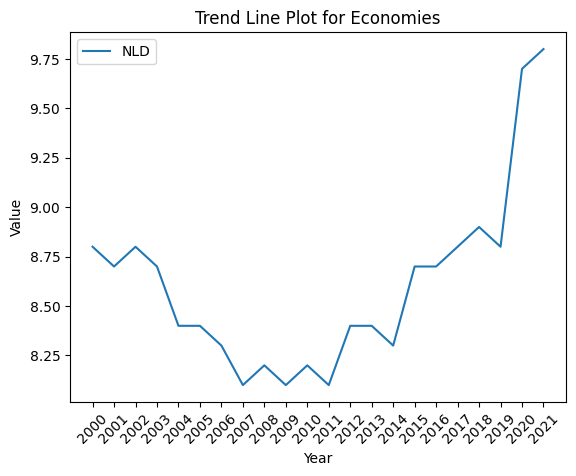

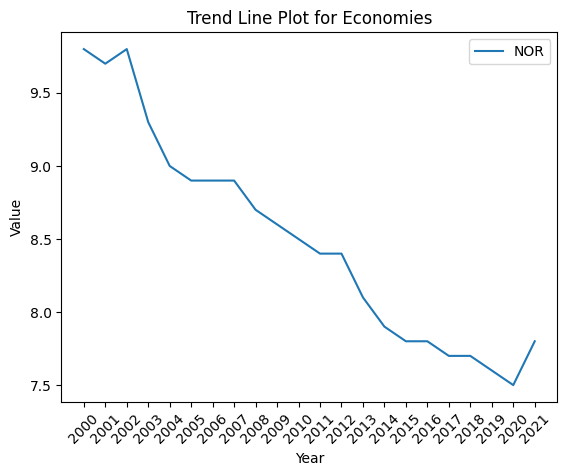

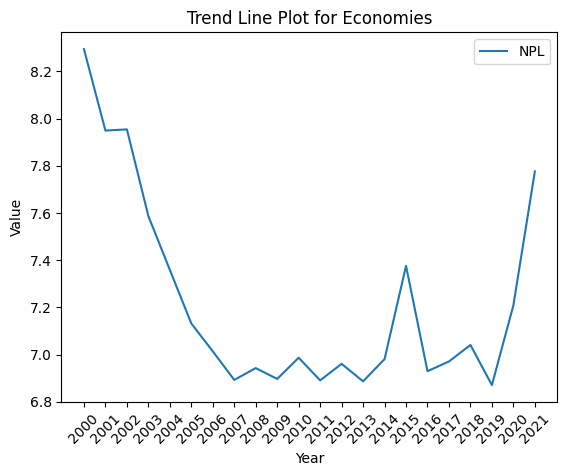

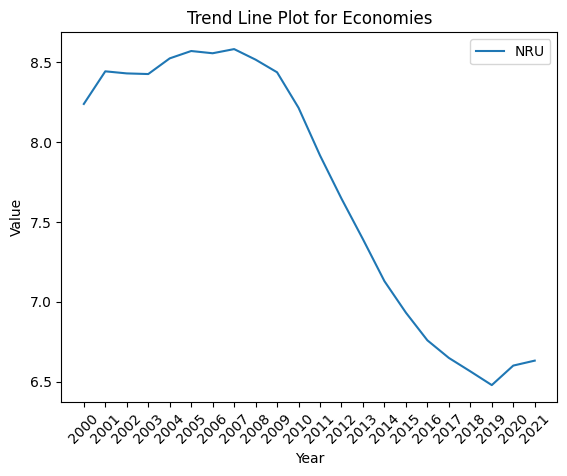

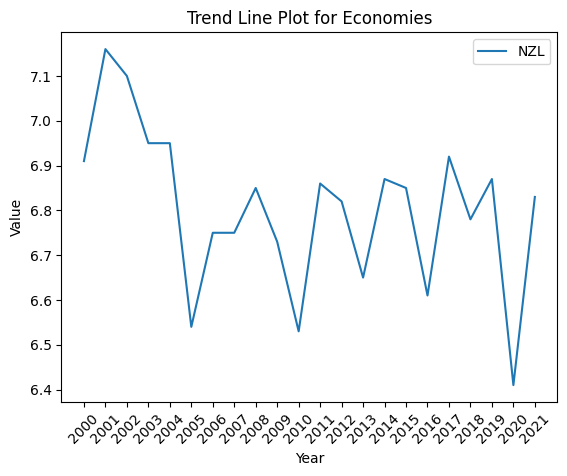

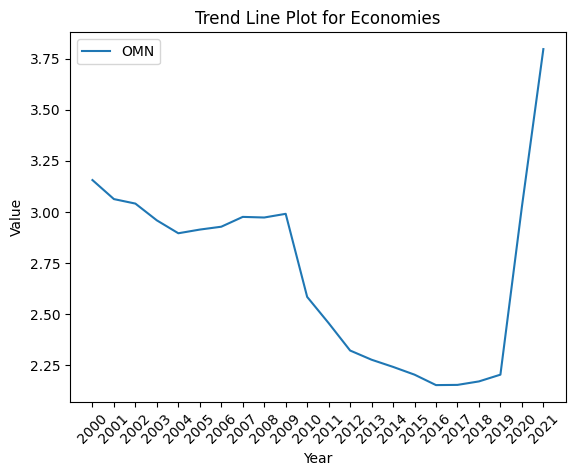

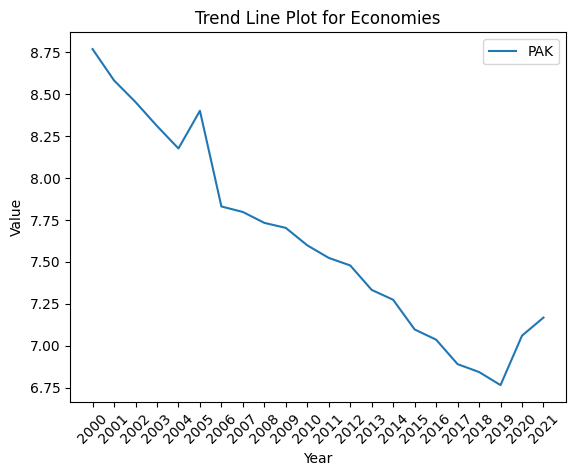

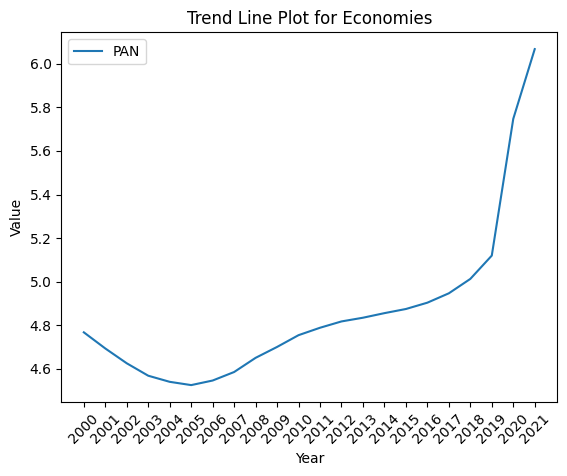

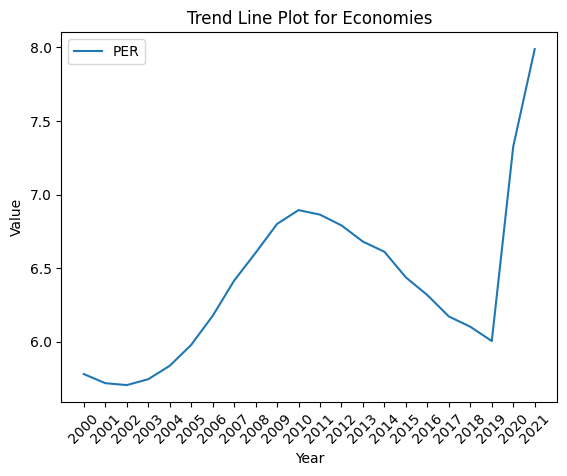

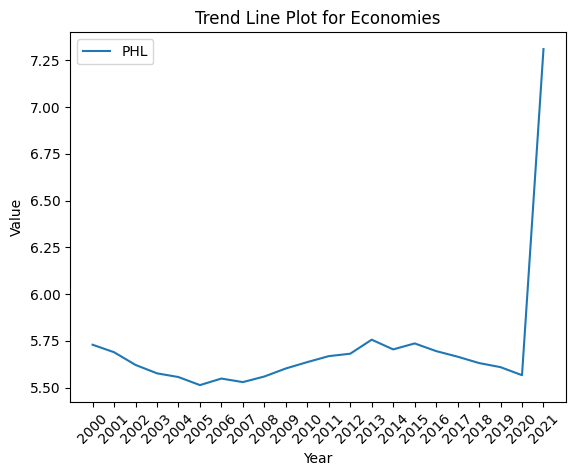

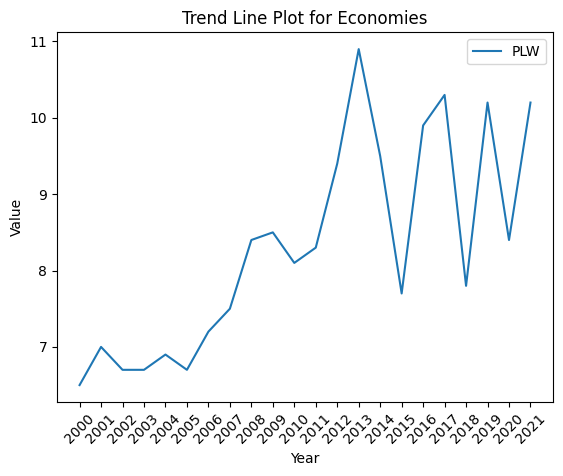

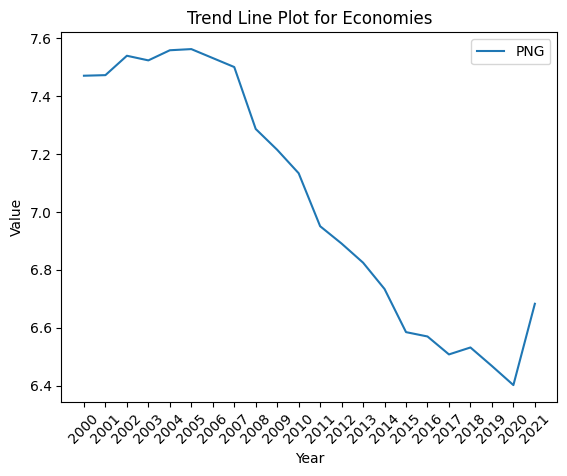

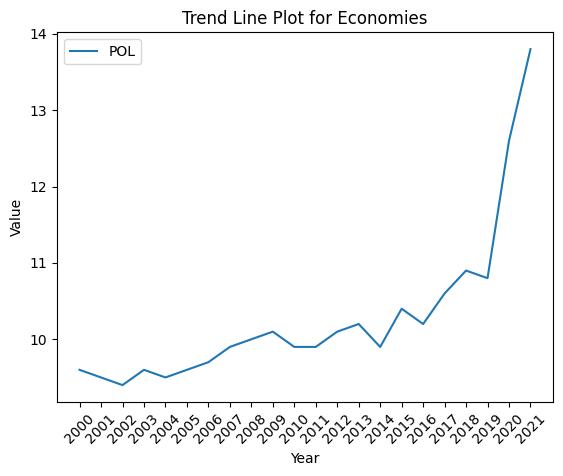

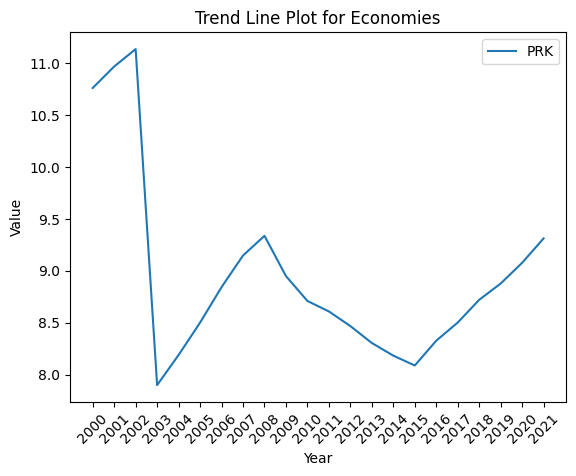

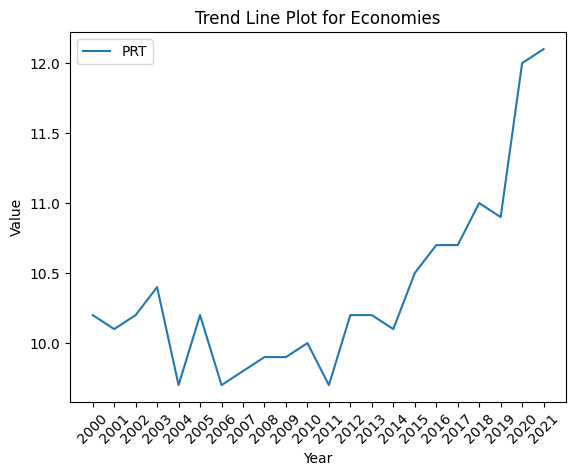

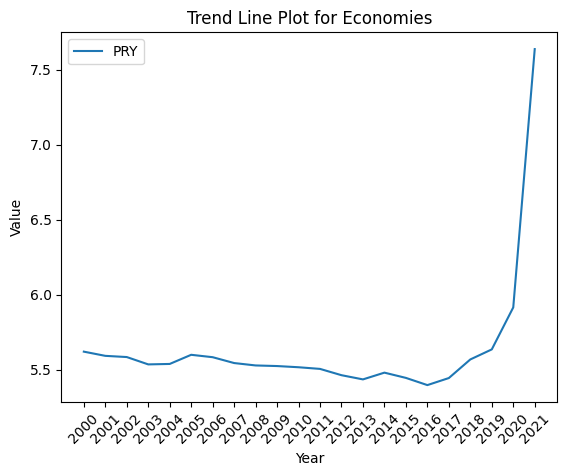

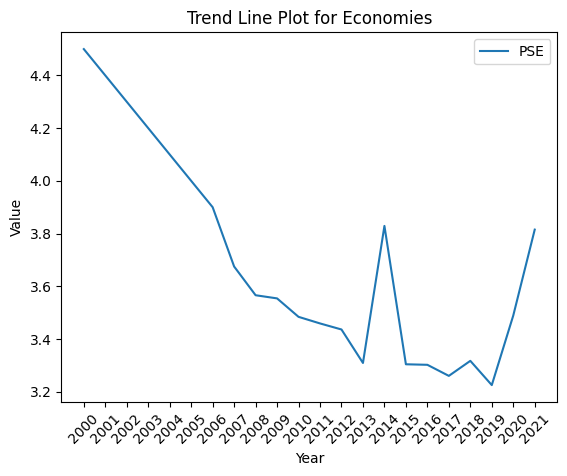

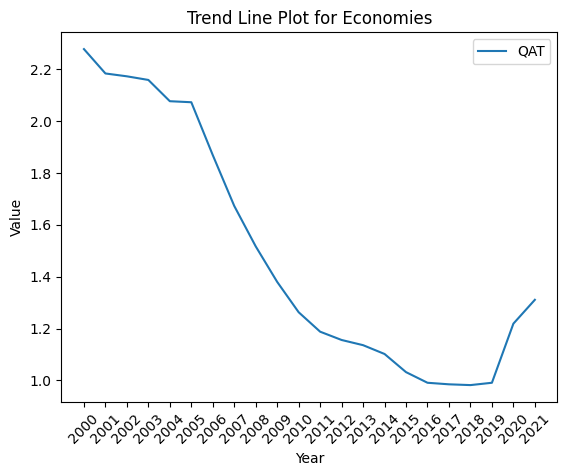

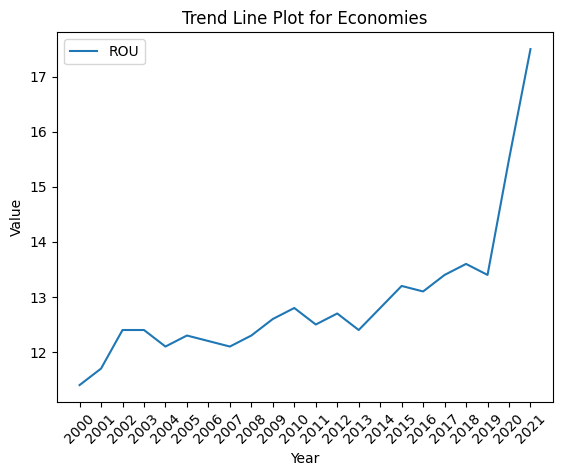

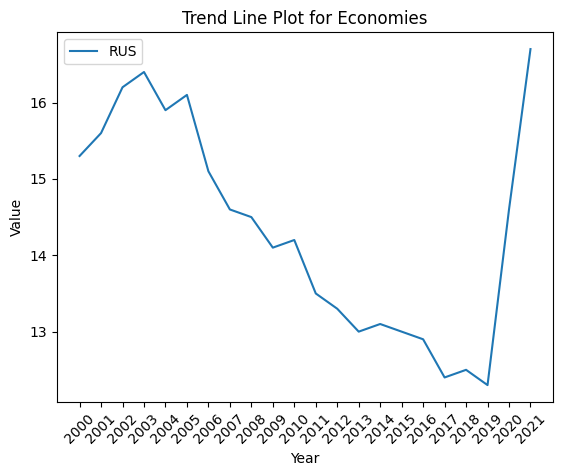

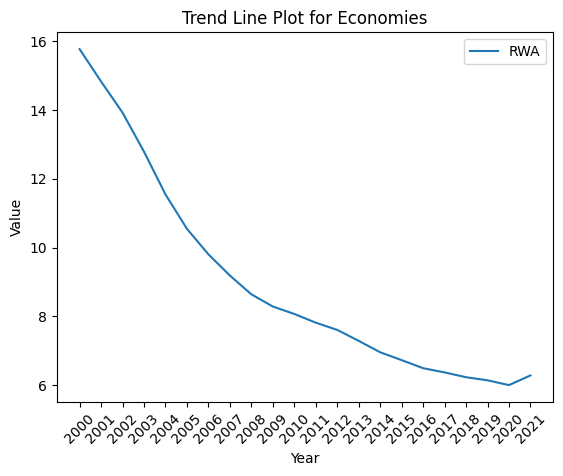

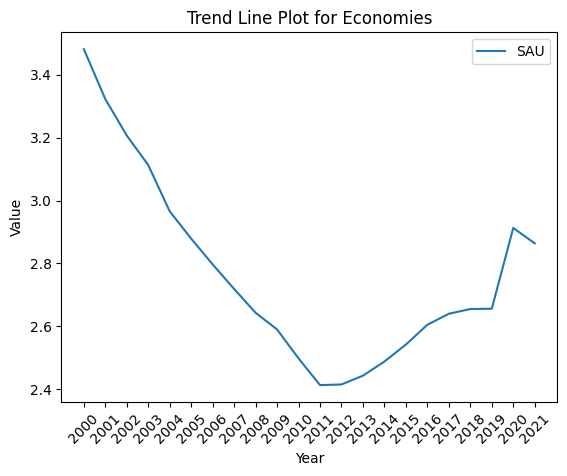

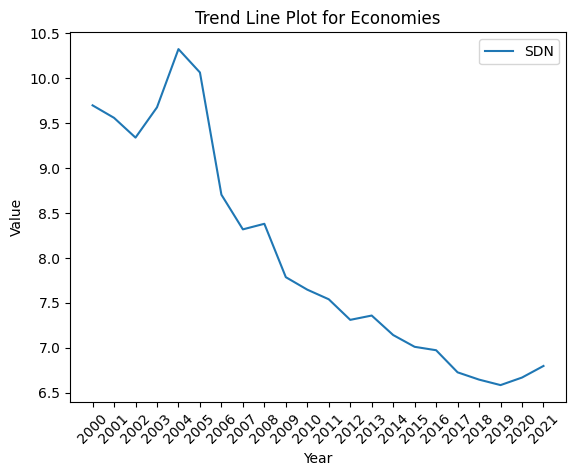

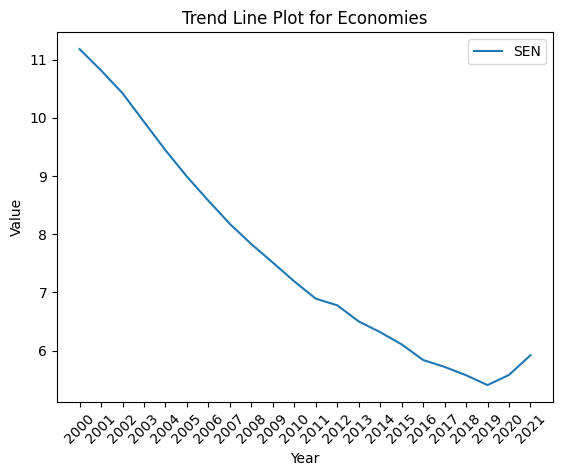

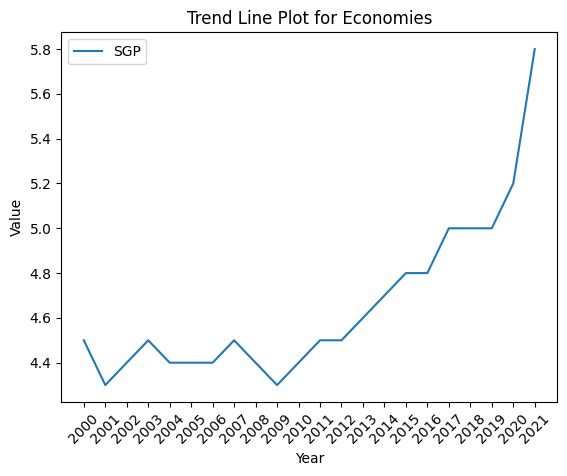

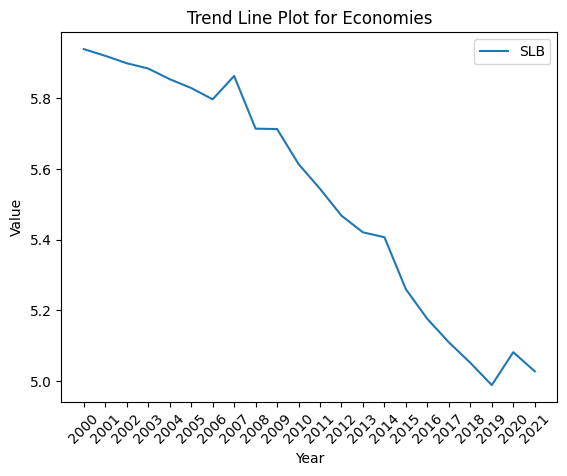

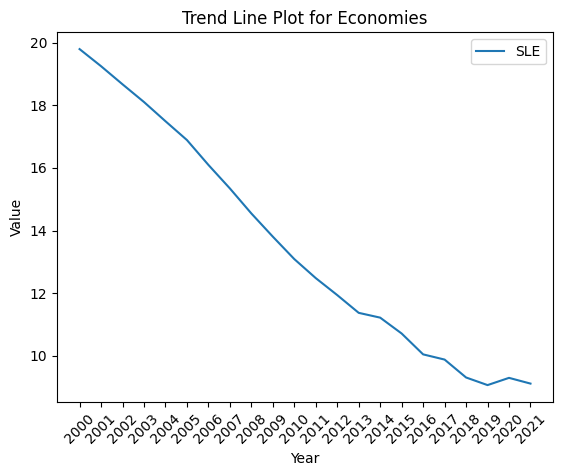

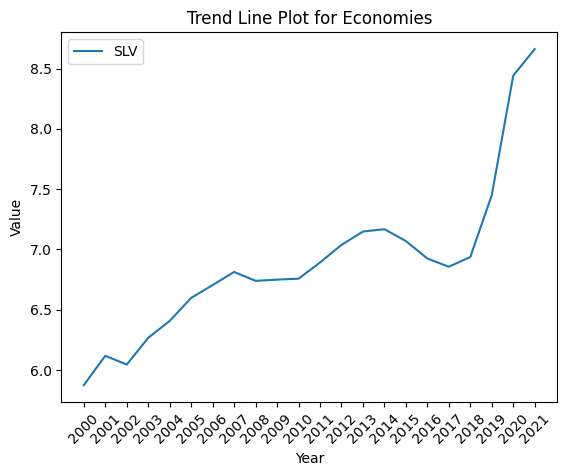

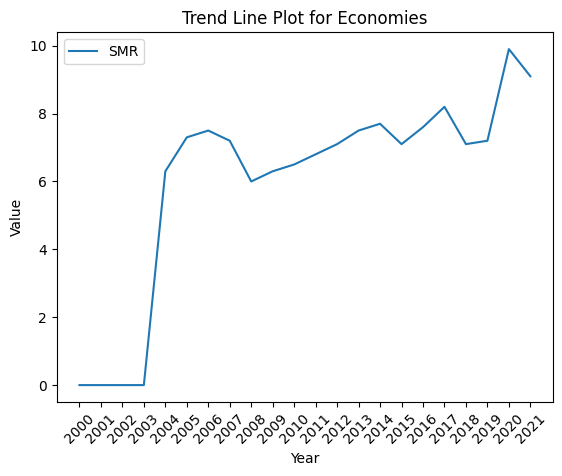

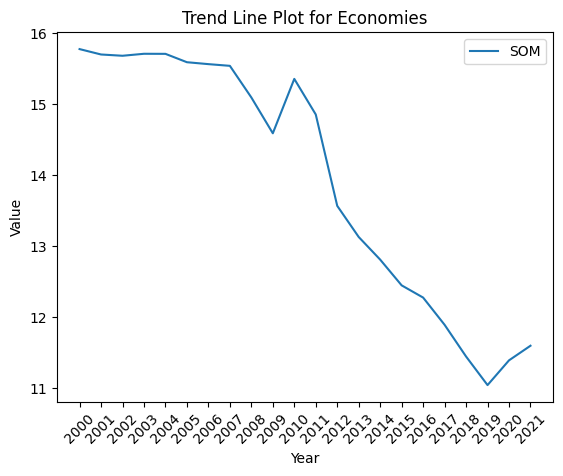

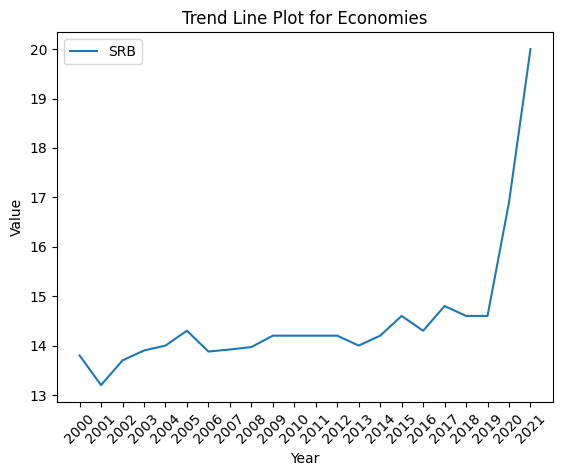

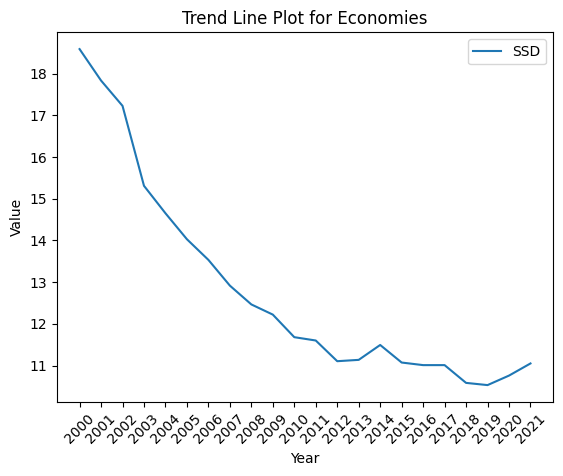

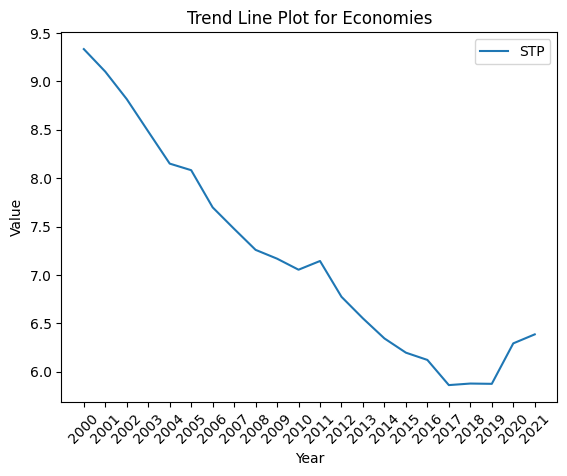

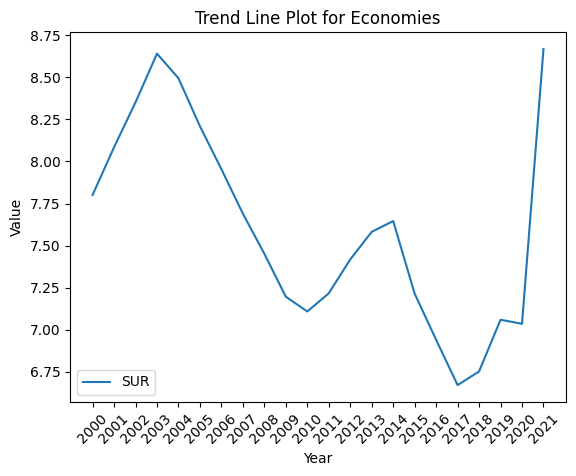

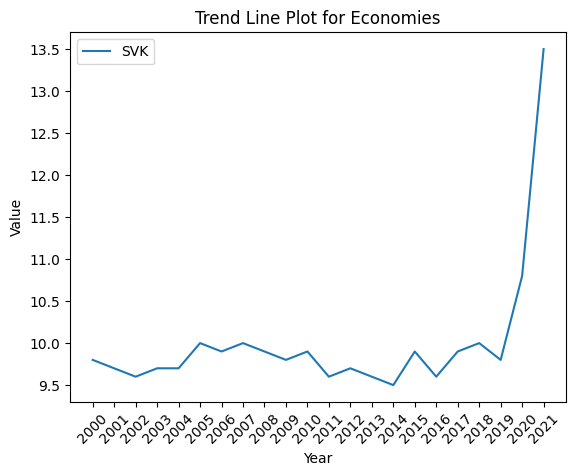

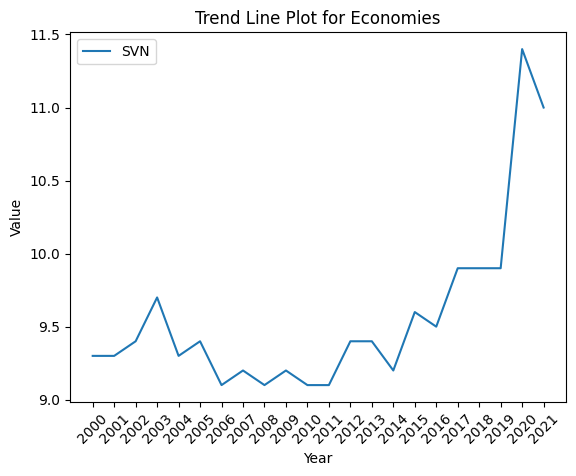

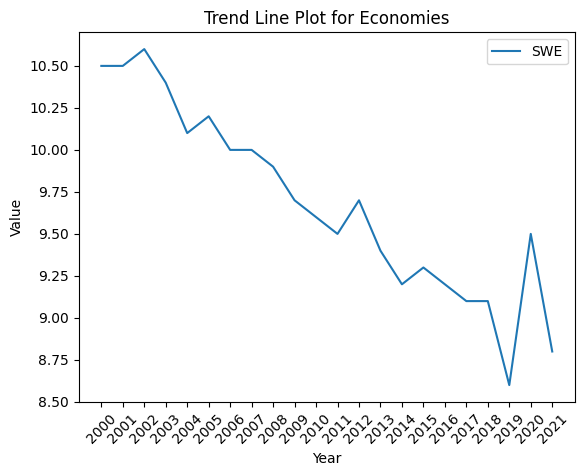

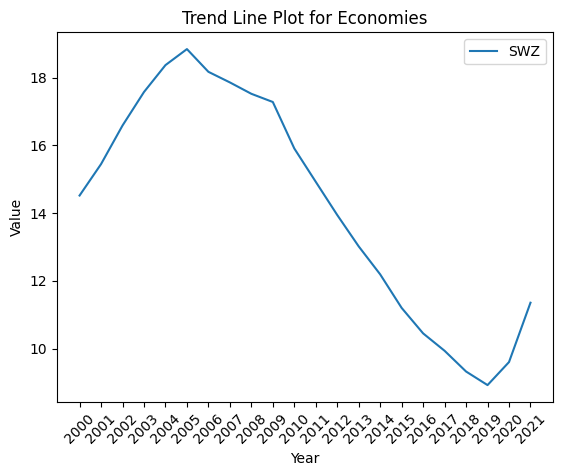

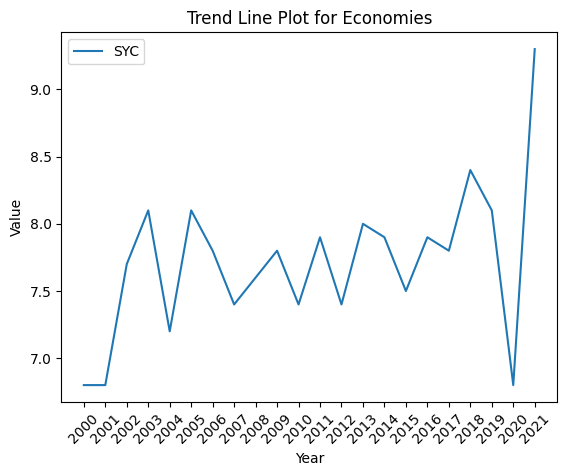

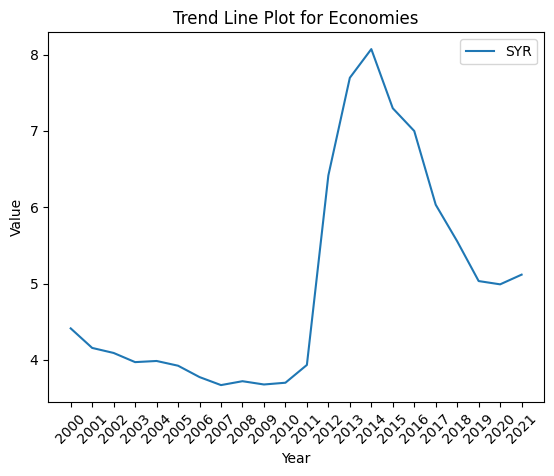

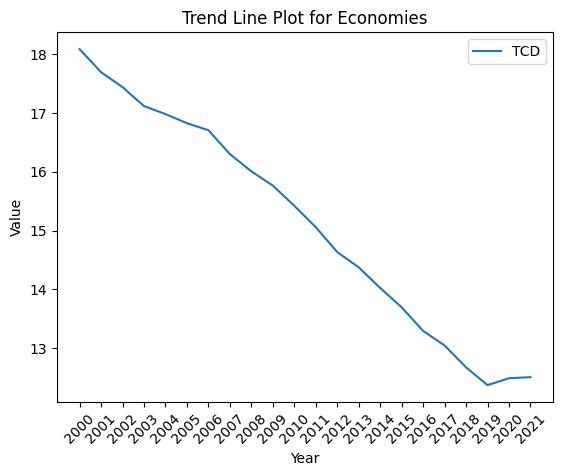

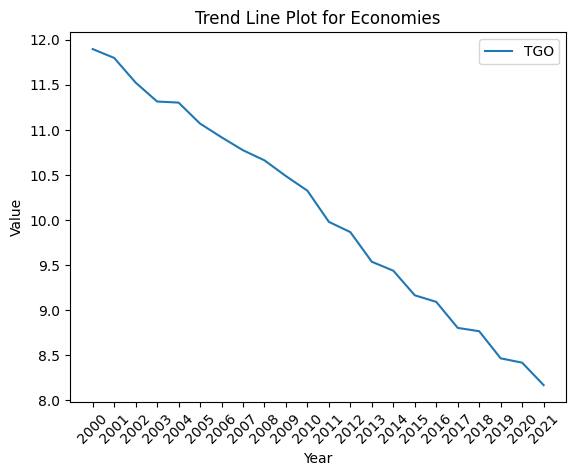

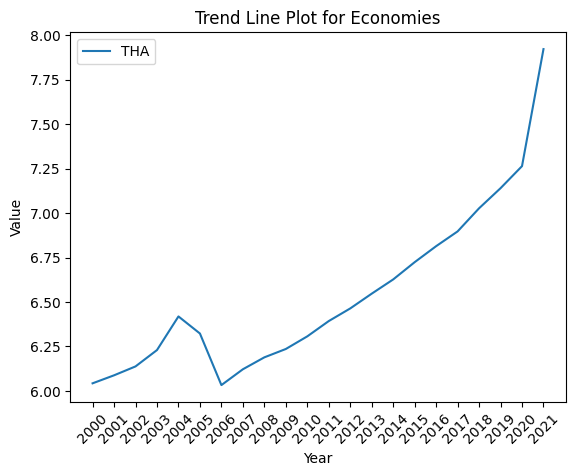

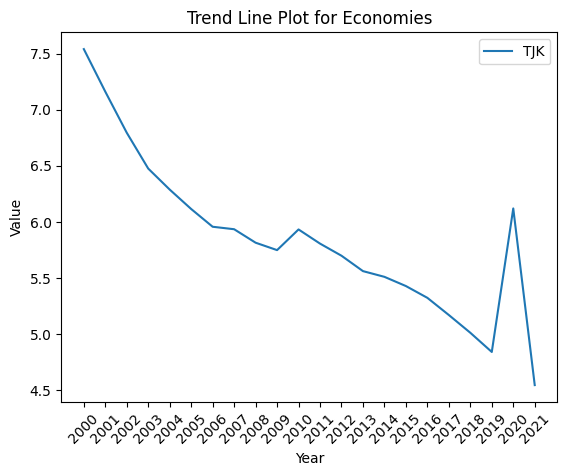

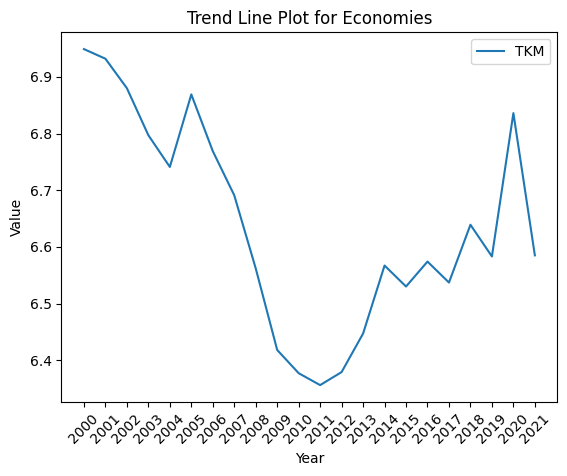

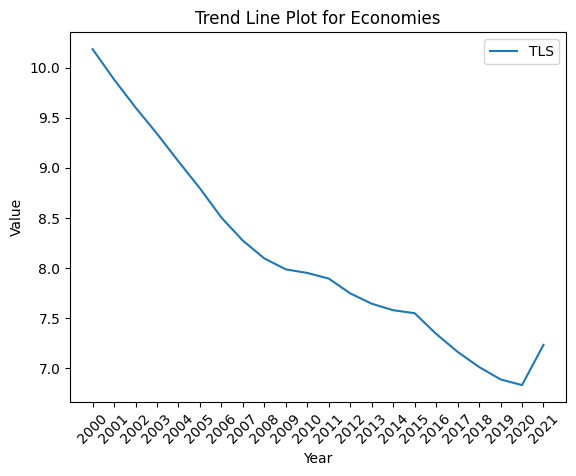

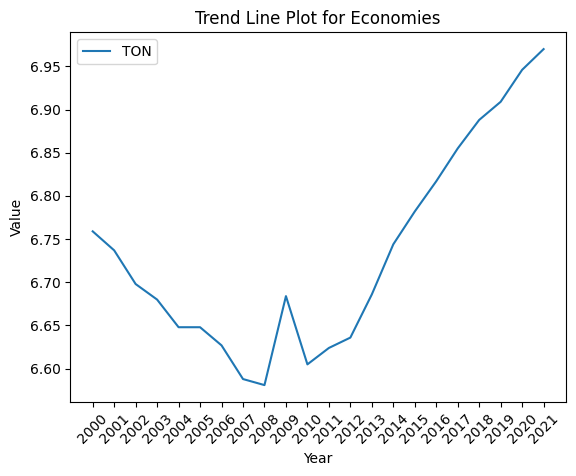

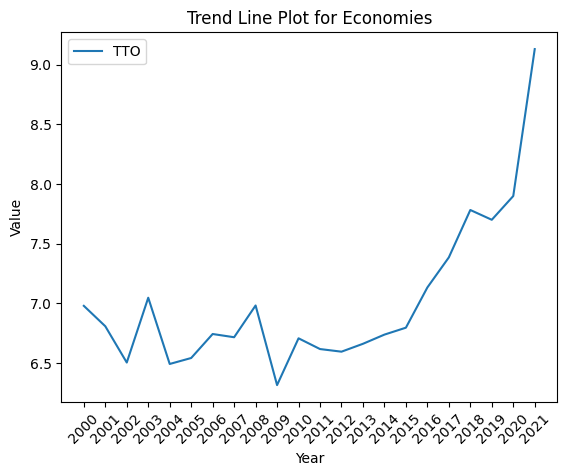

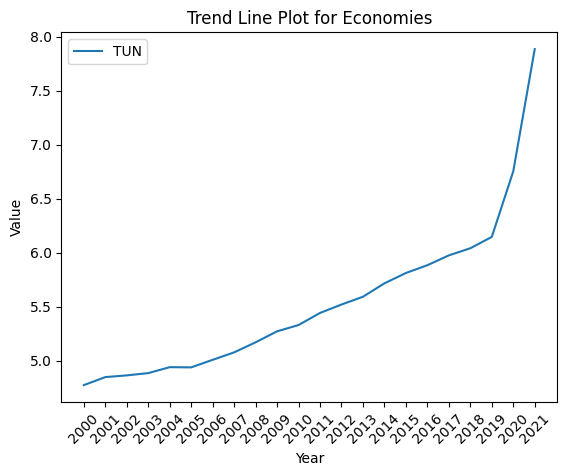

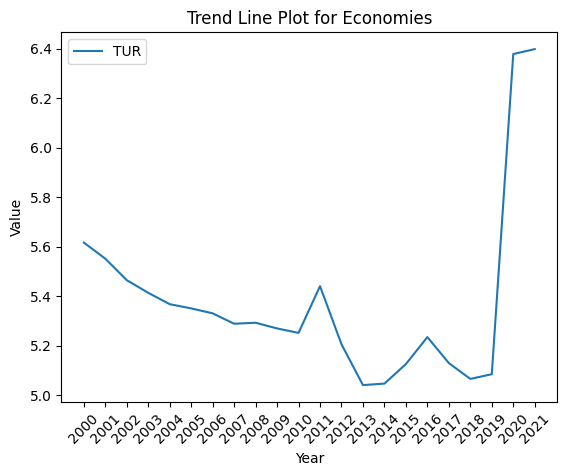

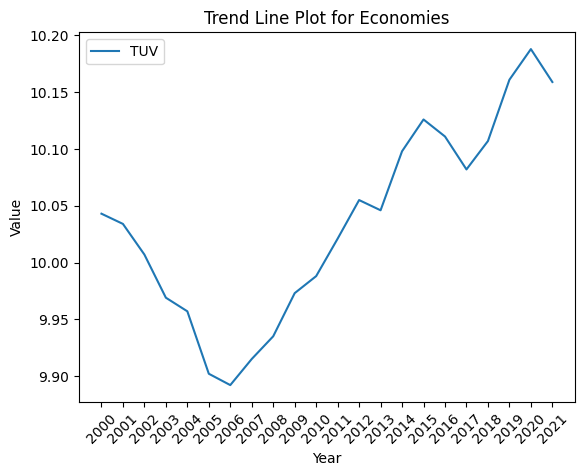

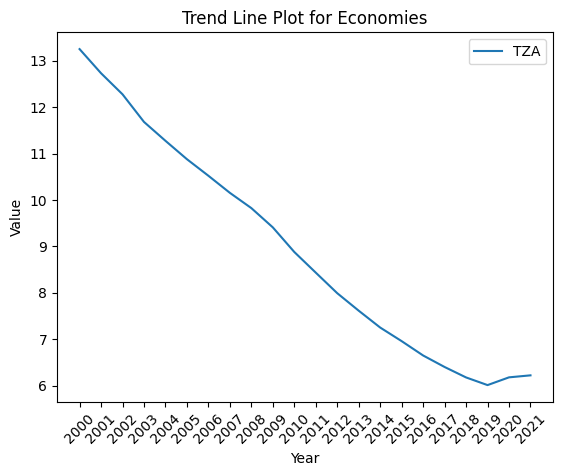

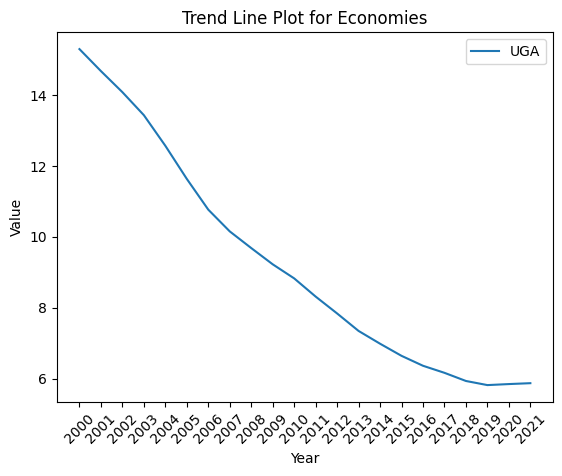

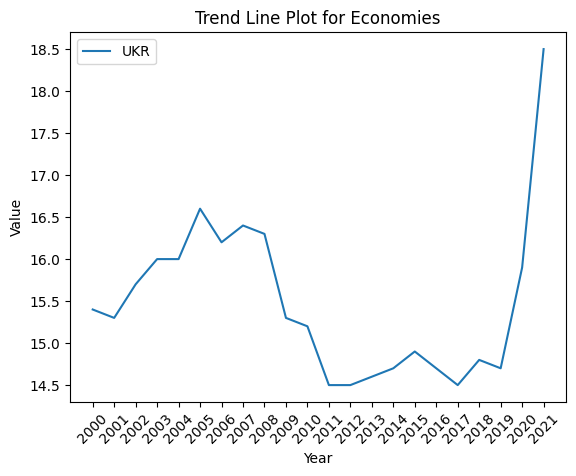

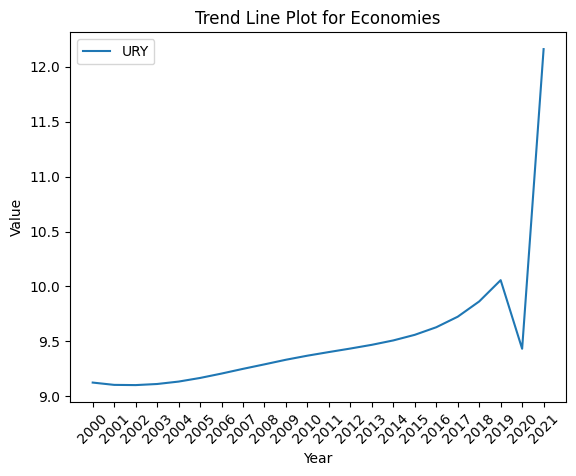

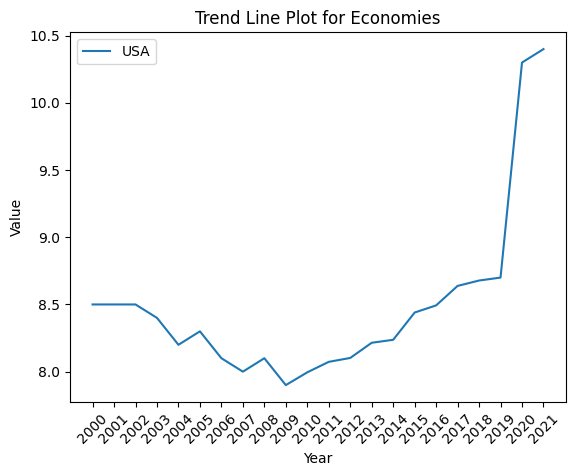

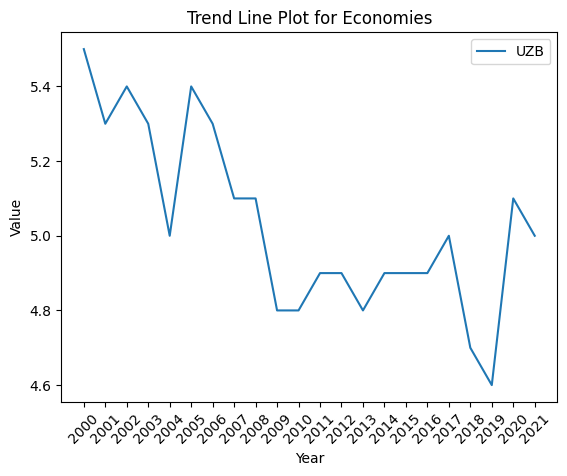

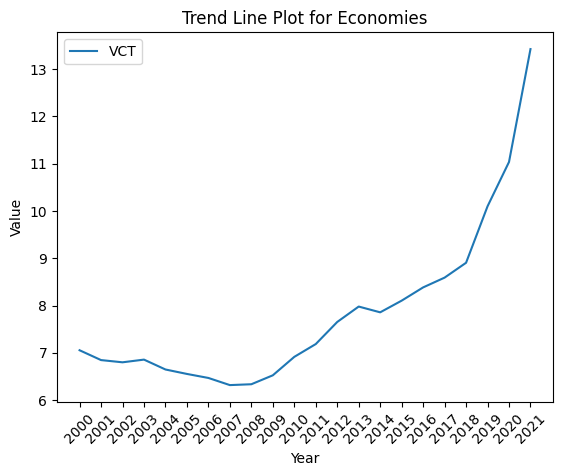

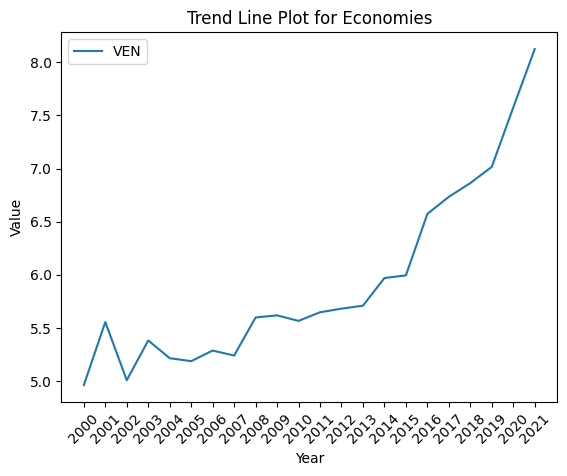

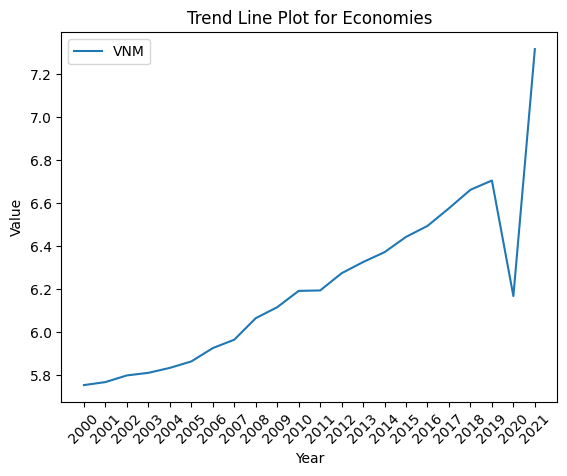

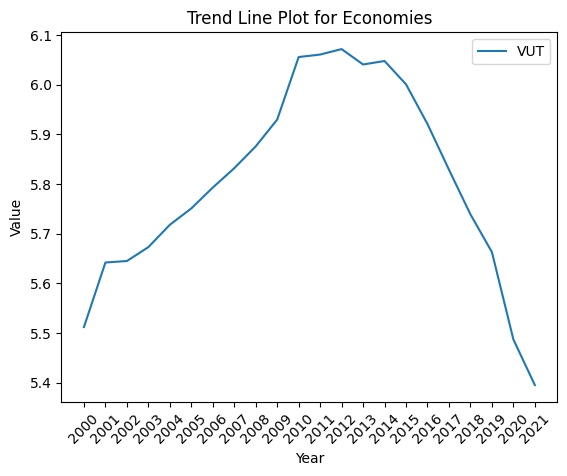

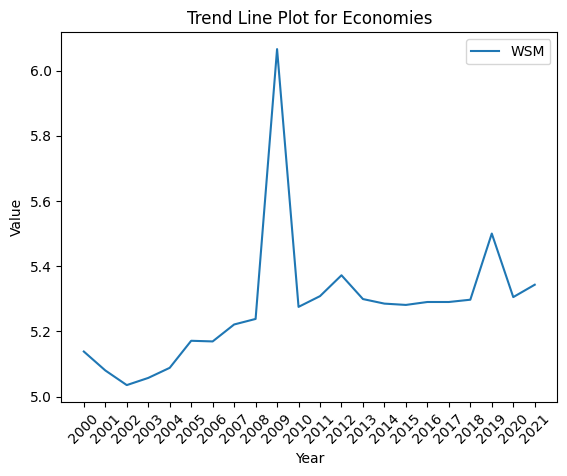

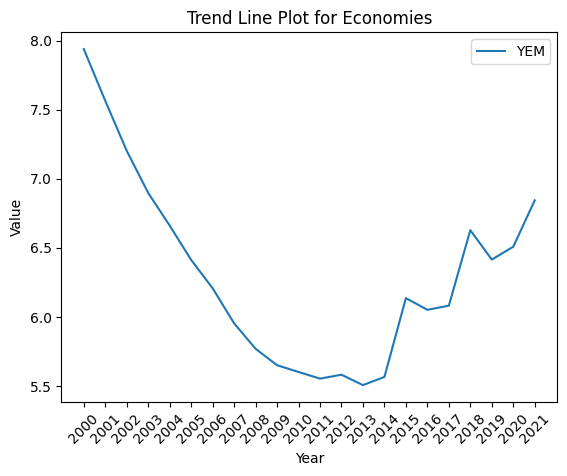

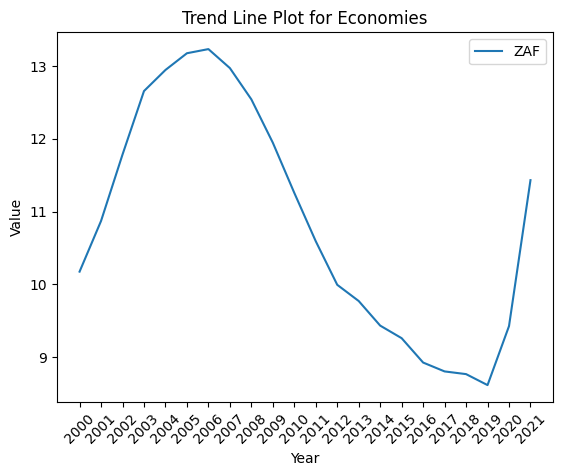

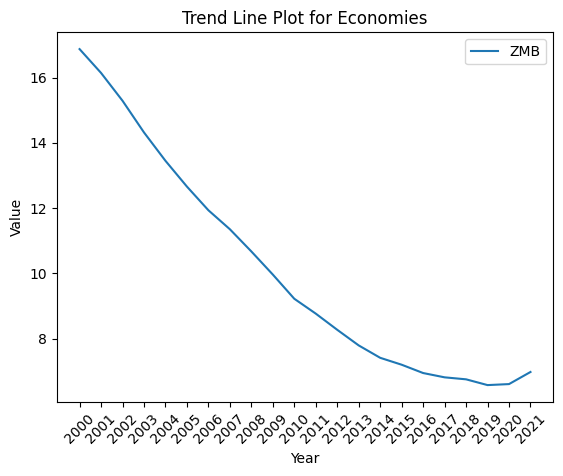

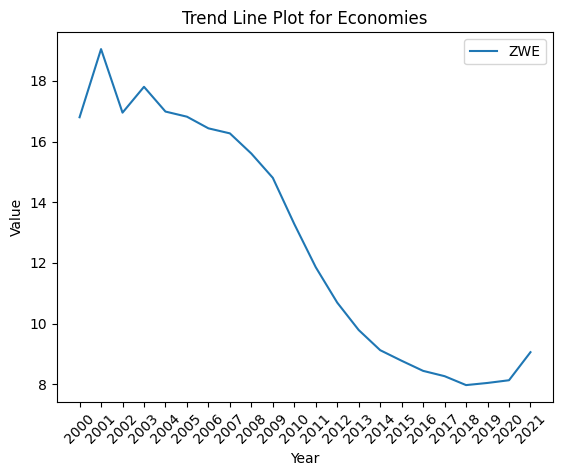

In [13]:
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], label=row['economy'])
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Trend Line Plot for Economies')
    plt.legend()
    plt.xticks(rotation=-315)
    plt.show()

# for index, row in df.iterrows():
#     train.value.plot(figsize=(15,8), title= 'Monthly Passenger', fontsize=14)
#     test.value.plot(figsize=(15,8), title= 'Monthly Passenger', fontsize=14)
    
#     plt.show()

In [14]:
df_pivot

economy     AFG     AGO     ALB  AND    ARE    ARG     ARM    ATG  AUS   AUT  \
Year                                                                           
2000     12.096  18.287   5.798  0.0  2.107  7.600   8.270  6.587  6.7   9.6   
2001     11.713  17.789   5.872  0.0  2.047  7.549   8.344  6.305  6.6   9.3   
2002     11.280  17.275   5.953  0.0  1.987  7.518   8.593  6.072  6.8   9.4   
2003     10.698  15.804   6.057  0.0  1.661  7.864   8.573  6.142  6.6   9.5   
2004     10.277  15.151   6.181  3.8  1.613  7.480   8.919  6.075  6.5   9.1   
2005      9.941  14.497   6.306  3.6  1.563  7.423   8.914  6.015  6.4   9.1   
2006      9.679  13.943   6.477  3.3  1.449  7.369   9.063  6.077  6.4   9.0   
2007      9.359  13.133   6.318  2.8  1.229  7.748   9.117  5.914  6.7   9.0   
2008      8.832  12.478   6.570  2.8  1.011  7.467   9.387  5.813  6.7   9.0   
2009      8.535  11.788   6.810  3.2  0.867  7.410   9.356  5.727  6.5   9.3   
2010      8.254  11.177   7.029  2.8  0.795  7.661   9.384  5.700  6.5   9.2   
2011      7.931  10.630   7.238  0.0  0.820  7.510   9.559  5.624  6.6   9.1   
2012      7.711  10.031   7.573  3.9  0.850  7.394   9.761  5.585  6.6   9.4   
2013      7.478   9.607   7.819  0.0  0.896  7.494   9.813  5.565  6.4   9.4   
2014      7.395   9.181   7.868  0.0  0.948  7.447   9.704  5.544  6.6   9.2   
2015      7.331   8.826   7.947  0.0  1.014  7.543   9.607  5.649  6.6   9.6   
2016      7.077   8.555   8.035  4.3  1.102  7.947   9.634  5.662  6.6   9.2   
2017      7.027   8.242   8.150  0.0  1.202  7.692   9.664  5.746  6.5   9.5   
2018      6.981   7.990   8.308  4.4  1.324  7.680   9.750  5.787  6.3   9.5   
2019      6.791   7.811   8.480  3.9  1.471  7.600   9.662  5.865  6.7   9.4   
2020      7.113   7.821  10.785  0.0  1.766  8.509  12.792  5.961  6.3  10.3   
2021      7.344   8.009  11.325  0.0  1.874  8.955  13.007  6.365  6.7  10.3   

economy  ...  UZB     VCT    VEN    VNM    VUT    WSM    YEM     ZAF     ZMB  \
Year     ...                                                                   
2000     ...  5.5   7.056  4.964  5.755  5.512  5.138  7.940  10.174  16.876   
2001     ...  5.3   6.848  5.557  5.769  5.642  5.080  7.565  10.871  16.145   
2002     ...  5.4   6.801  5.010  5.800  5.645  5.035  7.203  11.784  15.292   
2003     ...  5.3   6.858  5.384  5.812  5.673  5.057  6.898  12.657  14.320   
2004     ...  5.0   6.649  5.217  5.835  5.718  5.088  6.662  12.947  13.450   
2005     ...  5.4   6.555  5.189  5.865  5.751  5.171  6.413  13.177  12.659   
2006     ...  5.3   6.470  5.289  5.927  5.793  5.169  6.208  13.234  11.933   
2007     ...  5.1   6.319  5.242  5.966  5.832  5.221  5.954  12.973  11.351   
2008     ...  5.1   6.337  5.600  6.066  5.876  5.238  5.770  12.543  10.670   
2009     ...  4.8   6.526  5.620  6.117  5.930  6.066  5.651  11.947   9.961   
2010     ...  4.8   6.916  5.568  6.193  6.056  5.275  5.602  11.257   9.219   
2011     ...  4.9   7.187  5.649  6.195  6.061  5.308  5.554  10.592   8.763   
2012     ...  4.9   7.654  5.683  6.275  6.072  5.372  5.582   9.993   8.267   
2013     ...  4.8   7.980  5.711  6.327  6.041  5.299  5.507   9.770   7.788   
2014     ...  4.9   7.858  5.971  6.373  6.048  5.285  5.566   9.432   7.408   
2015     ...  4.9   8.105  5.996  6.444  6.001  5.281  6.137   9.259   7.196   
2016     ...  4.9   8.385  6.574  6.495  5.921  5.290  6.052   8.924   6.941   
2017     ...  5.0   8.592  6.735  6.577  5.829  5.290  6.082   8.802   6.809   
2018     ...  4.7   8.906  6.864  6.663  5.739  5.297  6.629   8.765   6.748   
2019     ...  4.6  10.100  7.017  6.706  5.663  5.500  6.416   8.614   6.571   
2020     ...  5.1  11.038  7.575  6.169  5.487  5.305  6.509   9.425   6.602   
2021     ...  5.0  13.425  8.124  7.317  5.395  5.343  6.845  11.432   6.973   

economy     ZWE  
Year             
2000     16.801  
2001     19.048  
2002     16.953  
2003     17.805  
2004     16.989  
2005     16.820  
2006     16.43

In [15]:
df_pivot.to_csv('data death.csv', index=True)

## Time Series Modelling

In [16]:
df_d = pd.read_csv('data death.csv')
df_d.head()

Year     AFG     AGO    ALB  AND    ARE    ARG    ARM    ATG  AUS  ...  \
0  2000  12.096  18.287  5.798  0.0  2.107  7.600  8.270  6.587  6.7  ...   
1  2001  11.713  17.789  5.872  0.0  2.047  7.549  8.344  6.305  6.6  ...   
2  2002  11.280  17.275  5.953  0.0  1.987  7.518  8.593  6.072  6.8  ...   
3  2003  10.698  15.804  6.057  0.0  1.661  7.864  8.573  6.142  6.6  ...   
4  2004  10.277  15.151  6.181  3.8  1.613  7.480  8.919  6.075  6.5  ...   

   UZB    VCT    VEN    VNM    VUT    WSM    YEM     ZAF     ZMB     ZWE  
0  5.5  7.056  4.964  5.755  5.512  5.138  7.940  10.174  16.876  16.801  
1  5.3  6.848  5.557  5.769  5.642  5.080  7.565  10.871  16.145  19.048  
2  5.4  6.801  5.010  5.800  5.645  5.035  7.203  11.784  15.292  16.953  
3  5.3  6.858  5.384  5.812  5.673  5.057  6.898  12.657  14.320  17.805  
4  5.0  6.649  5.217  5.835  5.718  5.088  6.662  12.947  13.450  16.989  

[5 rows x 195 columns]

In [17]:
df_d['Year'] = pd.to_datetime(df_d['Year'], format='%Y')
df_d.set_index('Year', inplace=True)

In [18]:
df_d

AFG     AGO     ALB  AND    ARE    ARG     ARM    ATG  AUS  \
Year                                                                        
2000-01-01  12.096  18.287   5.798  0.0  2.107  7.600   8.270  6.587  6.7   
2001-01-01  11.713  17.789   5.872  0.0  2.047  7.549   8.344  6.305  6.6   
2002-01-01  11.280  17.275   5.953  0.0  1.987  7.518   8.593  6.072  6.8   
2003-01-01  10.698  15.804   6.057  0.0  1.661  7.864   8.573  6.142  6.6   
2004-01-01  10.277  15.151   6.181  3.8  1.613  7.480   8.919  6.075  6.5   
2005-01-01   9.941  14.497   6.306  3.6  1.563  7.423   8.914  6.015  6.4   
2006-01-01   9.679  13.943   6.477  3.3  1.449  7.369   9.063  6.077  6.4   
2007-01-01   9.359  13.133   6.318  2.8  1.229  7.748   9.117  5.914  6.7   
2008-01-01   8.832  12.478   6.570  2.8  1.011  7.467   9.387  5.813  6.7   
2009-01-01   8.535  11.788   6.810  3.2  0.867  7.410   9.356  5.727  6.5   
2010-01-01   8.254  11.177   7.029  2.8  0.795  7.661   9.384  5.700  6.5   
2011-01-01   7.931  10.630   7.238  0.0  0.820  7.510   9.559  5.624  6.6   
2012-01-01   7.711  10.031   7.573  3.9  0.850  7.394   9.761  5.585  6.6   
2013-01-01   7.478   9.607   7.819  0.0  0.896  7.494   9.813  5.565  6.4   
2014-01-01   7.395   9.181   7.868  0.0  0.948  7.447   9.704  5.544  6.6   
2015-01-01   7.331   8.826   7.947  0.0  1.014  7.543   9.607  5.649  6.6   
2016-01-01   7.077   8.555   8.035  4.3  1.102  7.947   9.634  5.662  6.6   
2017-01-01   7.027   8.242   8.150  0.0  1.202  7.692   9.664  5.746  6.5   
2018-01-01   6.981   7.990   8.308  4.4  1.324  7.680   9.750  5.787  6.3   
2019-01-01   6.791   7.811   8.480  3.9  1.471  7.600   9.662  5.865  6.7   
2020-01-01   7.113   7.821  10.785  0.0  1.766  8.509  12.792  5.961  6.3   
2021-01-01   7.344   8.009  11.325  0.0  1.874  8.955  13.007  6.365  6.7   

             AUT  ...  UZB     VCT    VEN    VNM    VUT    WSM    YEM     ZAF  \
Year              ...                                                           
2000-01-01   9.6  ...  5.5   7.056  4.964  5.755  5.512  5.138  7.940  10.174   
2001-01-01   9.3  ...  5.3   6.848  5.557  5.769  5.642  5.080  7.565  10.871   
2002-01-01   9.4  ...  5.4   6.801  5.010  5.800  5.645  5.035  7.203  11.784   
2003-01-01   9.5  ...  5.3   6.858  5.384  5.812  5.673  5.057  6.898  12.657   
2004-01-01   9.1  ...  5.0   6.649  5.217  5.835  5.718  5.088  6.662  12.947   
2005-01-01   9.1  ...  5.4   6.555  5.189  5.865  5.751  5.171  6.413  13.177   
2006-01-01   9.0  ...  5.3   6.470  5.289  5.927  5.793  5.169  6.208  13.234   
2007-01-01   9.0  ...  5.1   6.319  5.242  5.966  5.832  5.221  5.954  12.973   
2008-01-01   9.0  ...  5.1   6.337  5.600  6.066  5.876  5.238  5.770  12.543   
2009-01-01   9.3  ...  4.8   6.526  5.620  6.117  5.930  6.066  5.651  11.947   
2010-01-01   9.2  ...  4.8   6.916  5.568  6.193  6.056  5.275  5.602  11.257   
2011-01-01   9.1  ...  4.9   7.187  5.649  6.195  6.061  5.308  5.554  10.592   
2012-01-01   9.4  ...  4.9   7.654  5.683  6.275  6.072  5.372  5.582   9.993   
2013-01-01   9.4  ...  4.8   7.980  5.711  6.327  6.041  5.299  5.507   9.770   
2014-01-01   9.2  ...  4.9   7.858  5.971  6.373  6.048  5.285  5.566   9.432   
2015-01-01   9.6  ...  4.9   8.105  5.996  6.444  6.001  5.281  6.137   9.259   
2016-01-01   9.2  ...  4.9   8.385  6.574  6.495  5.921  5.290  6.052   8.924   
2017-01-01   9.5  ...  5.0   8.592  6.735  6.577  5.829  5.290  6.082   8.802   
2018-01-01   9.5  ...  4.7   8.906  6.864  6.663  5.739  5.297  6.629   8.765   
2019-01-01   9.4  ...  4.6  10.100  7.017  6.706  5.663  5.500  6.416   8.614   
2020-01-01  10.3  ...  5.1  11.038  7.575  6.169  5.487  5.305  6.509   9.425   
2021-01-01  10.3  ...  5.0  13.425  8.124  7.317  5.395  5.343  6.845  11.432   

               ZMB     ZWE  
Year                        
2000-01-01  16.876  16.801  
2001-01-01  16.145  19.048  
2002-01-01  15.292  16.953  
2003-01-01  14.320  17.805  
2004-01-01  13.450  16.989  
2005-01-01  12.659

In [19]:
df_d.shape

(22, 194)

In [25]:
country = 'AFG'

In [26]:
train_data = df_d[country][0:15]
test_data = df_d[country][15:]

test_data = test_data.rename_axis('Year').reset_index(name='Value')
test_data = pd.DataFrame(test_data)

test_data

Year  Value
0 2015-01-01  7.331
1 2016-01-01  7.077
2 2017-01-01  7.027
3 2018-01-01  6.981
4 2019-01-01  6.791
5 2020-01-01  7.113
6 2021-01-01  7.344

In [27]:
train_data = train_data.rename_axis('Year').reset_index(name='Value')
train_data = pd.DataFrame(train_data)

train_data

Year   Value
0  2000-01-01  12.096
1  2001-01-01  11.713
2  2002-01-01  11.280
3  2003-01-01  10.698
4  2004-01-01  10.277
5  2005-01-01   9.941
6  2006-01-01   9.679
7  2007-01-01   9.359
8  2008-01-01   8.832
9  2009-01-01   8.535
10 2010-01-01   8.254
11 2011-01-01   7.931
12 2012-01-01   7.711
13 2013-01-01   7.478
14 2014-01-01   7.395

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
model = ExponentialSmoothing(np.asarray(train_data['Value']) ,seasonal_periods=1, trend='add')
model_fit = model.fit()

In [30]:
future_years = pd.date_range(start='2022-01-01', end='2027-01-01', freq='Y')

In [31]:
forecast = model_fit.forecast(steps=5)

In [32]:
forecast_df = pd.DataFrame({'Year': future_years, 'AFG': forecast})

In [33]:
combined_df = pd.concat([df_d, forecast_df.set_index('Year')])

In [34]:
forecast_df.head()

Year       AFG
0 2022-12-31  7.221409
1 2023-12-31  7.047818
2 2024-12-31  6.874227
3 2025-12-31  6.700637
4 2026-12-31  6.527046

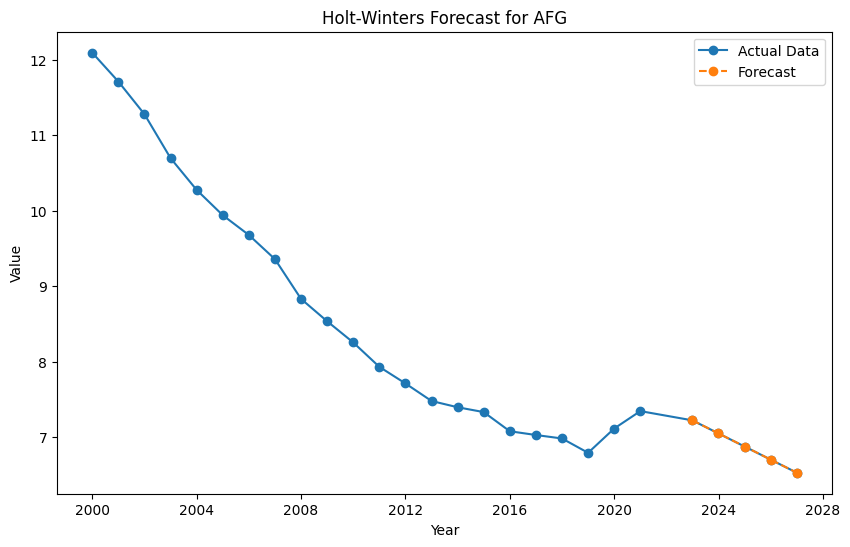

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df[country], label='Actual Data', marker='o')
plt.plot(forecast_df['Year'], forecast_df['AFG'], label='Forecast', linestyle='dashed', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'Holt-Winters Forecast for {country}')
plt.legend()
plt.show()

In [36]:
combined_df

AFG     AGO     ALB  AND    ARE    ARG     ARM    ATG  AUS  \
Year                                                                           
2000-01-01  12.096000  18.287   5.798  0.0  2.107  7.600   8.270  6.587  6.7   
2001-01-01  11.713000  17.789   5.872  0.0  2.047  7.549   8.344  6.305  6.6   
2002-01-01  11.280000  17.275   5.953  0.0  1.987  7.518   8.593  6.072  6.8   
2003-01-01  10.698000  15.804   6.057  0.0  1.661  7.864   8.573  6.142  6.6   
2004-01-01  10.277000  15.151   6.181  3.8  1.613  7.480   8.919  6.075  6.5   
2005-01-01   9.941000  14.497   6.306  3.6  1.563  7.423   8.914  6.015  6.4   
2006-01-01   9.679000  13.943   6.477  3.3  1.449  7.369   9.063  6.077  6.4   
2007-01-01   9.359000  13.133   6.318  2.8  1.229  7.748   9.117  5.914  6.7   
2008-01-01   8.832000  12.478   6.570  2.8  1.011  7.467   9.387  5.813  6.7   
2009-01-01   8.535000  11.788   6.810  3.2  0.867  7.410   9.356  5.727  6.5   
2010-01-01   8.254000  11.177   7.029  2.8  0.795  7.661   9.384  5.700  6.5   
2011-01-01   7.931000  10.630   7.238  0.0  0.820  7.510   9.559  5.624  6.6   
2012-01-01   7.711000  10.031   7.573  3.9  0.850  7.394   9.761  5.585  6.6   
2013-01-01   7.478000   9.607   7.819  0.0  0.896  7.494   9.813  5.565  6.4   
2014-01-01   7.395000   9.181   7.868  0.0  0.948  7.447   9.704  5.544  6.6   
2015-01-01   7.331000   8.826   7.947  0.0  1.014  7.543   9.607  5.649  6.6   
2016-01-01   7.077000   8.555   8.035  4.3  1.102  7.947   9.634  5.662  6.6   
2017-01-01   7.027000   8.242   8.150  0.0  1.202  7.692   9.664  5.746  6.5   
2018-01-01   6.981000   7.990   8.308  4.4  1.324  7.680   9.750  5.787  6.3   
2019-01-01   6.791000   7.811   8.480  3.9  1.471  7.600   9.662  5.865  6.7   
2020-01-01   7.113000   7.821  10.785  0.0  1.766  8.509  12.792  5.961  6.3   
2021-01-01   7.344000   8.009  11.325  0.0  1.874  8.955  13.007  6.365  6.7   
2022-12-31   7.221409     NaN     NaN  NaN    NaN    NaN     NaN    NaN  NaN   
2023-12-31   7.047818     NaN     NaN  NaN    NaN    NaN     NaN    NaN  NaN   
2024-12-31   6.874227     NaN     NaN  NaN    NaN    NaN     NaN    NaN  NaN   
2025-12-31   6.700637     NaN     NaN  NaN    NaN    NaN     NaN    NaN  NaN   
2026-12-31   6.527046     NaN     NaN  NaN    NaN    NaN     NaN    NaN  NaN   

             AUT  ...  UZB     VCT    VEN    VNM    VUT    WSM    YEM     ZAF  \
Year              ...                                                           
2000-01-01   9.6  ...  5.5   7.056  4.964  5.755  5.512  5.138  7.940  10.174   
2001-01-01   9.3  ...  5.3   6.848  5.557  5.769  5.642  5.080  7.565  10.871   
2002-01-01   9.4  ...  5.4   6.801  5.010  5.800  5.645  5.035  7.203  11.784   
2003-01-01   9.5  ...  5.3   6.858  5.384  5.812  5.673  5.057  6.898  12.657   
2004-01-01   9.1  ...  5.0   6.649  5.217  5.835  5.718  5.088  6.662  12.947   
2005-01-01   9.1  ...  5.4   6.555  5.189  5.865  5.751  5.171  6.413  13.177   
2006-01-01   9.0  ...  5.3   6.470  5.289  5.927  5.793  5.169  6.208  13.234   
2007-01-01   9.0  ...  5.1   6.319  5.242  5.966  5.832  5.221  5.954  12.973   
2008-01-01   9.0  ...  5.1   6.337  5.600  6.066  5.876  5.238  5.770  12.543   
2009-01-01   9.3  ...  4.8   6.526  5.620  6.117  5.930  6.066  5.651  11.947   
2010-01-01   9.2  ...  4.8   6.916  5.568  6.193  6.056  5.275  5.602  11.257   
2011-01-01   9.1  ...  4.9   7.187  5.649  6.195  6.061  5.308  5.554  10.592   
2012-01-01   9.4  ...  4.9   7.654  5.683  6.275  6.072  5.372  5.582   9.993   
2013-01-01   9.4  ...  4.8   7.980  5.711  6.327  6.041  5.299  5.507   9.770   
2014-01-01   9.2  ...  4.9   7.858  5.971  6.373  6.048  5.285  5.566   9.432   
2015-01-01   9.6  ...  4.9   8.105  5.996  6.444  6.001  5.281  6.137   9.259   
2016-01-01   9.2  ...  4.9   8.385  6.574  6.495  5.921  5.290  6.052   8.924   
2017-01-01   9.5  ...  5.0   8.592  6.735  6.577  5.829  5.290  6.082   8.802   
2018-01-01   9.5  ...  4.7   8.906  6.864  6.663  5.739  5.297  6.629   8.765

## Apply on all countries

In [38]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# def forecast(country):
#   train_data = df_d[country][0:18]
#   test_data = df_d[country][18:]

#   test_data = test_data.rename_axis('Year').reset_index(name='Value')
#   test_data = pd.DataFrame(test_data)
#   train_data = train_data.rename_axis('Year').reset_index(name='Value')
#   train_data = pd.DataFrame(train_data)

#   model = ExponentialSmoothing(np.asarray(train_data['Value']) ,seasonal_periods=1, trend='add')
#   model_fit = model.fit()

#   future_years = pd.date_range(start='2022-01-01', end='2026-01-01', freq='Y')

#   forecast = model_fit.forecast(steps=4)

#   forecast_df = pd.DataFrame({'Year': future_years, country: forecast})

#   combined_df = pd.concat([df_d, forecast_df.set_index('Year')])

# forecast('AFG')


# Create an empty DataFrame to store the forecasts
combined_df = df_d.copy()  # Initialize with the original data

def forecast(country):
    global combined_df  # Declare combined_df as a global variable

    train_data = df_d[country][0:18]
    test_data = df_d[country][18:]

    test_data = test_data.rename_axis('Year').reset_index(name='Value')
    train_data = train_data.rename_axis('Year').reset_index(name='Value')

    model = ExponentialSmoothing(np.asarray(train_data['Value']), seasonal_periods=1, trend='add')
    model_fit = model.fit()

    future_years = pd.date_range(start='2022-01-01', end='2027-01-01', freq='Y')

    forecast = model_fit.forecast(steps=5)

    forecast_df = pd.DataFrame({'Year': future_years, country: forecast})

    # Append the forecast to combined_df
    combined_df = pd.concat([combined_df, forecast_df.set_index('Year')], axis=0)

    return combined_df

# Perform forecasts for each country
for i in df_d.columns:
  forecast(i)
# Add more countries as needed

# Print combined_df to see all forecasts
combined_df

AFG     AGO    ALB  AND    ARE    ARG    ARM    ATG  AUS  AUT  \
Year                                                                           
2000-01-01  12.096  18.287  5.798  0.0  2.107  7.600  8.270  6.587  6.7  9.6   
2001-01-01  11.713  17.789  5.872  0.0  2.047  7.549  8.344  6.305  6.6  9.3   
2002-01-01  11.280  17.275  5.953  0.0  1.987  7.518  8.593  6.072  6.8  9.4   
2003-01-01  10.698  15.804  6.057  0.0  1.661  7.864  8.573  6.142  6.6  9.5   
2004-01-01  10.277  15.151  6.181  3.8  1.613  7.480  8.919  6.075  6.5  9.1   
...            ...     ...    ...  ...    ...    ...    ...    ...  ...  ...   
2022-12-31     NaN     NaN    NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2023-12-31     NaN     NaN    NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2024-12-31     NaN     NaN    NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2025-12-31     NaN     NaN    NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2026-12-31     NaN     NaN    NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   

            ...  UZB    VCT    VEN    VNM    VUT    WSM    YEM     ZAF  \
Year        ...                                                          
2000-01-01  ...  5.5  7.056  4.964  5.755  5.512  5.138  7.940  10.174   
2001-01-01  ...  5.3  6.848  5.557  5.769  5.642  5.080  7.565  10.871   
2002-01-01  ...  5.4  6.801  5.010  5.800  5.645  5.035  7.203  11.784   
2003-01-01  ...  5.3  6.858  5.384  5.812  5.673  5.057  6.898  12.657   
2004-01-01  ...  5.0  6.649  5.217  5.835  5.718  5.088  6.662  12.947   
...         ...  ...    ...    ...    ...    ...    ...    ...     ...   
2022-12-31  ...  NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2023-12-31  ...  NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2024-12-31  ...  NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2025-12-31  ...  NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
2026-12-31  ...  NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   

               ZMB        ZWE  
Year                           
2000-01-01  16.876  16.801000  
2001-01-01  16.145  19.048000  
2002-01-01  15.292  16.953000  
2003-01-01  14.320  17.805000  
2004-01-01  13.450  16.989000  
...            ...        ...  
2022-12-31     NaN   7.878722  
2023-12-31     NaN   7.665868  
2024-12-31     NaN   7.453013  
2025-12-31     NaN   7.240158  
2026-12-31     NaN   7.027303  

[992 rows x 194 columns]

In [39]:
data = combined_df.groupby('Year').mean().reset_index()
data

Year        AFG        AGO        ALB       AND       ARE       ARG  \
0  2000-01-01  12.096000  18.287000   5.798000  0.000000  2.107000  7.600000   
1  2001-01-01  11.713000  17.789000   5.872000  0.000000  2.047000  7.549000   
2  2002-01-01  11.280000  17.275000   5.953000  0.000000  1.987000  7.518000   
3  2003-01-01  10.698000  15.804000   6.057000  0.000000  1.661000  7.864000   
4  2004-01-01  10.277000  15.151000   6.181000  3.800000  1.613000  7.480000   
5  2005-01-01   9.941000  14.497000   6.306000  3.600000  1.563000  7.423000   
6  2006-01-01   9.679000  13.943000   6.477000  3.300000  1.449000  7.369000   
7  2007-01-01   9.359000  13.133000   6.318000  2.800000  1.229000  7.748000   
8  2008-01-01   8.832000  12.478000   6.570000  2.800000  1.011000  7.467000   
9  2009-01-01   8.535000  11.788000   6.810000  3.200000  0.867000  7.410000   
10 2010-01-01   8.254000  11.177000   7.029000  2.800000  0.795000  7.661000   
11 2011-01-01   7.931000  10.630000   7.238000  0.000000  0.820000  7.510000   
12 2012-01-01   7.711000  10.031000   7.573000  3.900000  0.850000  7.394000   
13 2013-01-01   7.478000   9.607000   7.819000  0.000000  0.896000  7.494000   
14 2014-01-01   7.395000   9.181000   7.868000  0.000000  0.948000  7.447000   
15 2015-01-01   7.331000   8.826000   7.947000  0.000000  1.014000  7.543000   
16 2016-01-01   7.077000   8.555000   8.035000  4.300000  1.102000  7.947000   
17 2017-01-01   7.027000   8.242000   8.150000  0.000000  1.202000  7.692000   
18 2018-01-01   6.981000   7.990000   8.308000  4.400000  1.324000  7.680000   
19 2019-01-01   6.791000   7.811000   8.480000  3.900000  1.471000  7.600000   
20 2020-01-01   7.113000   7.821000  10.785000  0.000000  1.766000  8.509000   
21 2021-01-01   7.344000   8.009000  11.325000  0.000000  1.874000  8.955000   
22 2022-12-31   6.903760   7.882841   8.288317  1.854275  1.288047  7.597118   
23 2023-12-31   6.780521   7.582131   8.426633  1.871098  1.374094  7.600814   
24 2024-12-31   6.657281   7.281421   8.564950  1.887921  1.460140  7.604511   
25 2025-12-31   6.534042   6.980711   8.703267  1.904744  1.546187  7.608207   
26 2026-12-31   6.410802   6.680002   8.841584  1.921567  1.632234  7.611904   

          ARM       ATG       AUS  ...       UZB        VCT       VEN  \
0    8.270000  6.587000  6.700000  ...  5.500000   7.056000  4.964000   
1    8.344000  6.305000  6.600000  ...  5.300000   6.848000  5.557000   
2    8.593000  6.072000  6.800000  ...  5.400000   6.801000  5.010000   
3    8.573000  6.142000  6.600000  ...  5.300000   6.858000  5.384000   
4    8.919000  6.075000  6.500000  ...  5.000000   6.649000  5.217000   
5    8.914000  6.015000  6.400000  ...  5.400000   6.555000  5.189000   
6    9.063000  6.077000  6.400000  ...  5.300000   6.470000  5.289000   
7    9.117000  5.914000  6.700000  ...  5.100000   6.319000  5.242000   
8    9.387000  5.813000  6.700000  ...  5.100000   6.337000  5.600000   
9    9.356000  5.727000  6.500000  ...  4.800000   6.526000  5.620000   
10   9.384000  5.700000  6.500000  ...  4.800000   6.916000  5.568000   
11   9.559000  5.624000  6.600000  ...  4.900000   7.187000  5.649000   
12   9.761000  5.585000  6.600000  ...  4.900000   7.654000  5.683000   
13   9.813000  5.565000  6.400000  ...  4.800000   7.980000  5.711000   
14   9.704000  5.544000  6.600000  ...  4.900000   7.858000  5.971000   
15   9.607000  5.649000  6.600000  ...  4.900000   8.105000  5.996000   
16   9.634000  5.662000  6.600000  ...  4.900000   8.385000  6.574000   
17   9.664000  5.746000  6.500000  ...  5.000000   8.592000  6.735000   
18   9.750000  5.787000  6.300000  ...  4.700000   8.906000  6.864000   
19   9.662000  5.865000  6.700000  ...  4.600000  10.100000  7.017000   
20  12.792000  5.961000  6.300000  ...  5.100000  11.038000  7.575000   
21  13.007000  6.365000  6.700000  ...  5.000000  13.425000  8.124000   
22   9.651019  5.784101  6.520281  ...  4.851612   8.810699  6.754389   
23   9.642023  5

In [40]:
data.to_csv('Predict Death.csv', index=False)